>### **To-Do:**
>
>1. **Perform manual EDA**  
>    - Data cleaning:  
>         - Rename columns.  
>         - Replace semester codes with more understandable values.  
>         - Drop columns: 'Institución', 'Grado' (verify unique values first), 'IDCurso', 'código de la sesión', 'Nombre de la >sección', 'sección', 'Clase asociada', and schedule-related variables.  
>         - After removing non-value-adding variables, group data to prevent duplicates. Ensure each row represents a unique class.  
>    - EDA:
>         - Análisis temporal: matricula, cursos, clases.
>         -  
>2. **Perfom automated EDA**  
>3. **Compare results between manual and automated EDA**
>4. **Run two regressions and compare results: one with the clean dataset and one with the dirty dataset.**

---

> **Master's Degree in Data Sciences** | EAFIT University  
> **Course:** Fundamentals of Data Science    
> **Group:** Sara Martinez Rendon (smartiner4@eafit.edu.co) | Heider Zapata (hzapata1@eafit.edu.co) | Yeison Londoño (ylondon4@eafit.edu.co)  
> **Date:** 14/02/2026
---

# **Final Project**

---

## 1. Business Understanding and Problem Context

This section describes the business environment and the specific problem to be solved.

* **Business Description:** What is the organization or sector about?  
     The organization is **Universidad EAFIT**, specifically focusing on the **Academic Registry Office** (*Oficina de Registro Académico*) and the Vice-Rectory of Learning. The sector is higher education, dealing with the complex logistics of planning and scheduling undergraduate academic courses for upcoming terms.

* **Problem Context:** What specific pain point or need are we addressing?  
     Currently, the academic scheduling process is manual, reactive, and relies exclusively on pre-registration data, which has proven to be an insufficient predictor of actual demand. This leads to significant operational inefficiencies, such as the need to close unnecessary groups last minute, recalculate student fees, and strain infrastructure and customer service resources. The existing gap between the courses offered and those actually demanded creates administrative rework and affects the university's reputation.

* **Justification:** Why is it relevant to solve this problem now?  
     It is relevant to solve this problem now to transition from a manual process to a data-driven approach using historical data (2022-2026). By implementing a regression model, the university aims to reduce the mismatch between projected supply and actual student demand by at least **50%** compared to the last 8 semesters. This will optimize resource allocation, automate tedious tasks, and allow administrative staff to shift focus from operational repairs to strategic activities.

---

## 2. Data Selection and Origin

**Select a dataset of interest and indicate where it was obtained.**

* **Dataset:** The project utilizes two datasets in Excel format (`.xlsx`), each containing 9 tables.
* **Source:** Internal data from **Universidad EAFIT** corresponding to the academic programming and pre-enrollment records for the period **2022-2026**.
* **Key Variables:**
    * Subjects (Asignaturas)
    * Groups per subject
    * Schedules (Horarios)
    * Group capacity
    * Registered students per subject (Matrícula vs. Pre-matrícula)
* **Initial Data Assessment:**
    * **Missing Values:** Yes, the dataset contains missing values (NaN).
    * **Duplicates:** Yes, duplicate records have been identified.
    * **Inconsistencies:** No major inconsistencies observed so far.
    * **Correlations:** There are closely related variables, specifically between pre-enrollment figures and final enrollment.

---

## 3. Justification and Value Added

**Justification of the dataset with the value added it could give to the business.**

* **Limitations of the Current Process:**
    * Currently, decision-making is based **exclusively on pre-enrollment figures**, omitting key factors such as historical behavior and approval rates.
    * The process is **manual and reactive**, leading to operational inefficiencies and a high volume of last-minute adjustments (closing or opening groups) at the start of the semester.

* **Advantages of Analyzing this Dataset (Value Proposition):**
    * **Strategic Automation:** Analyzing this historical data (2022-2026) allows for the transition from a manual process to a **predictive analytical model**.
    * **Resource Optimization:** The model aims to minimize the "mismatch rate" between offered and demanded courses. This directly reduces the administrative burden of closing unnecessary groups or scrambling to open new ones.
    * **Operational Efficiency:** By automating the forecasting of necessary groups, administrative staff can shift focus from tedious operational tasks to high-impact strategic activities for the institution.
    * By implementing a regression model, the university aims to reduce the mismatch between projected supply and actual student demand by at least **50%** compared to the last 8 semesters.
---

## 4. Data Preparation (Data Wrangling)

In this phase, data loading, cleaning, and transformation are performed.

### 4.1. Loading Libraries and Data
*Importing pandas, numpy, matplotlib, seaborn, etc.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

In [2]:
# Read dataframes in the 'data' folder and store them in a dictionary with the filename as the key

# 1. Define current location (inside 'notebooks' folder)
current_folder = Path.cwd() 

# 2. Define project root (Move up one level)
# .parent takes us from '.../notebooks' to '.../Project_Root'
project_root = current_folder.parent

# 3. Build the path to the data
data_path = project_root / "data" / "raw"

# Verification
if not data_path.exists():
    print(f"⚠️ Path still not found: {data_path}")
    print(f"Searching from: {project_root}")
else:
    print(f"✅ Path found successfully: {data_path}")
    
    # 4. Loading loop
    data_frame = {}
    for archivo in data_path.glob("*.xlsx"):
        nombre = archivo.stem 
        data_frame[nombre] = pd.read_excel(archivo, skiprows=9)
        print(f"   -> Loaded: {nombre}")

✅ Path found successfully: c:\Users\Usuario\Repositorios git\Maestria---Fundamentos-en-ciencia-de-datos\Proyecto_Final\data\raw
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397456
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397462
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397508
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397514
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397517
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397525
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397529
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397540
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397646


In [3]:
# Display the names of the dataframes that were successfully loaded
print(data_frame.keys())

dict_keys(['EA_PROGRAMACION_ACADEMIC_BASIC-18397456', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397462', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397508', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397514', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397517', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397525', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397529', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397540', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397646'])


In [4]:
# Display the dimensions (shape) of each dataframe
filas = []

for archivo, df in data_frame.items():
    print(f"File: {archivo}")
    print(df.shape)
    filas.append(df.shape[0])

print(f"Number of rows for each dataframe: {filas}")
print(f"Total number of rows for all dataframes combined: {sum(filas)}")

File: EA_PROGRAMACION_ACADEMIC_BASIC-18397456
(7726, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397462
(7969, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397508
(7155, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397514
(5663, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397517
(5541, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397525
(6802, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397529
(5188, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397540
(5345, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397646
(4862, 52)
Number of rows for each dataframe: [7726, 7969, 7155, 5663, 5541, 6802, 5188, 5345, 4862]
Total number of rows for all dataframes combined: 56251


In [5]:
# Concatenate all dataframes into a single one
prog_acad = pd.concat(data_frame.values(), ignore_index=True)

# Validate that the size matches the sum from the previous cell
print(prog_acad.shape)

(56251, 52)


In [78]:
# Download a copy of the concatenated dataset
#data_path = project_root / "data" / "processed" / "01_data_total.xlsx"
#prog_acad.to_excel(data_path, index=False)

### 4.2. Initial Exploration
*Reviewing structure, data types (`.info()`), and first rows (`.head()`).*

In [6]:
# Explore the academic programming dataframe for the last 9 semesters

pd.set_option("display.max_columns", None)
prog_acad.head(5)

,Institución,Grado,Ciclo,Código Catalogo,ID Curso,Nombre Catálogo,Código de la sesión,Sección,Nombre de la sesión,Número de Clase,Clase Asociada,Ubicación,Calendario Festivos,Modo Enseñanza,Modo Enseñanza Descr,Fec_Ini_Real_Clase,Fec_Fin_Real_Clase,Fecha_Ini_Mod_Reunión,Fecha_Fin_Mod_Reunión,Hora Inicio,Hora Fin,Días,Aula Asignada,Capacidad,Tipo Instalación,Código del Departamento,Docentes,Email Docente,Nom Estado Clase,Horas por semana,Metodología,Metodología descripción,Total Hrs Curso,Tipo de curso,Componente,Idioma,Rol Profesor,Acceso,Tipo Asignación,Tipo Clase,Componente Calificado,# Cupos disponibles,Tamaño Sección p/Def,Capcd Inscr,Tot Inscr,Estado Clase,Campus,Horas Programadas,Org Acad,Grupo Académico,Estado Inscripción,Prior
0,EAFIT - Universidad EAFIT,PREG,2661,CS0092,109867,Fotografía,ORD,5,Sesión Curso Ordinaria,7600,1,POBLADO,PREG,P,Presencial,2026-01-21,2026-05-13,2026-01-19,2026-05-16,06:00:00,09:00:00,Miercoles,NaN,0,NaN,CS,NaN,NaN,Detener Inscripción,DEFECTO,R,Magistral Reforma,48,ABIERTO,Clase,ESPANOL,Profesor Titular,Aprobar,Docencia normal,Sección Inscripción,Clase,20,20,20,0,S,MEDEL,48.0,SP,Escuela de Artes y Humanidades,Correcto,1
1,EAFIT - Universidad EAFIT,PREG,2661,CS0092,109867,Fotografía,ORD,6,Sesión Curso Ordinaria,7602,1,POBLADO,PREG,P,Presencial,2026-01-21,2026-05-13,2026-01-19,2026-05-16,15:00:00,18:00:00,Miercoles,Poblado Bloque 29 Aula 205,25,Aula normal,CS,1000137468-CC-1128275920-DAVID CORREA FRANCO-P...,dcorreaf@eafit.edu.co,Activo,DEFECTO,R,Magistral Reforma,48,ABIERTO,Clase,ESPANOL,Profesor Titular,Aprobar,Docencia normal,Sección Inscripción,Clase,0,20,9,9,A,MEDEL,48.0,SP,Escuela de Artes y Humanidades,Correcto,2
2,EAFIT - Universidad EAFIT,PREG,2661,CS0240,109937,Teo. de Func. y Efectos Comun.,ORD,2,Sesión Curso Ordinaria,1857,1,POBLADO,PREG,P,Presencial,2026-01-19,2026-05-16,NaT,NaT,NaN,NaN,NaN,NaN,0,NaN,CS,NaN,NaN,Sección Cancelada,DEFECTO,R,Magistral Reforma,48,ABIERTO,Clase,ESPANOL,NaN,NaN,NaN,Sección Inscripción,Clase,25,30,25,0,X,MEDEL,0.0,SP,Escuela de Artes y Humanidades,NaN,1
3,EAFIT - Universidad EAFIT,PREG,2661,LE0001,134275,Prueba de Lectura 1,ORD,1,Sesión Curso Ordinaria,7543,1,POBLADO,PREG,P,Presencial,2026-02-14,2026-02-14,2026-02-14,2026-02-14,07:00:00,09:00:00,Sábado,Poblado Bloque 18 Computo 315,30,Sala De Computo,LE,NaN,NaN,Detener Inscripción,DEFECTO,R,Magistral Reforma,2,ABIERTO,Clase,ESPANOL,NaN,NaN,NaN,Sección Inscripción,Clase,27,30,27,0,S,MEDEL,2.0,LE,Escuela de Artes y Humanidades,Correcto,5
4,EAFIT - Universidad EAFIT,PREG,2661,LE0001,134275,Prueba de Lectura 1,ORD,2,Sesión Curso Ordinaria,7544,1,POBLADO,PREG,P,Presencial,2026-02-14,2026-02-14,2026-02-14,2026-02-14,07:00:00,09:00:00,Sábado,Poblado Bloque 20 Computo 413,50,Sala De Computo- Lab Procesami,LE,NaN,NaN,Activo,DEFECTO,R,Magistral Reforma,2,ABIERTO,Clase,ESPANOL,NaN,NaN,NaN,Sección Inscripción,Clase,0,30,40,40,A,MEDEL,2.0,LE,Escuela de Artes y Humanidades,Correcto,1


In [7]:
prog_acad.columns

Index(['Institución', 'Grado', 'Ciclo', 'Código Catalogo', 'ID Curso',
       'Nombre Catálogo', 'Código de la sesión', 'Sección',
       'Nombre de la sesión', 'Número de Clase', 'Clase Asociada', 'Ubicación',
       'Calendario Festivos', 'Modo Enseñanza', 'Modo Enseñanza Descr',
       'Fec_Ini_Real_Clase', 'Fec_Fin_Real_Clase', 'Fecha_Ini_Mod_Reunión',
       'Fecha_Fin_Mod_Reunión', 'Hora Inicio', 'Hora Fin', 'Días',
       'Aula Asignada', 'Capacidad', 'Tipo Instalación',
       'Código del Departamento', 'Docentes', 'Email Docente',
       'Nom Estado Clase', 'Horas por semana', 'Metodología',
       'Metodología descripción', 'Total Hrs Curso', 'Tipo de curso',
       'Componente', 'Idioma', 'Rol Profesor', 'Acceso', 'Tipo Asignación',
       'Tipo Clase', 'Componente Calificado', '# Cupos disponibles',
       'Tamaño Sección p/Def', 'Capcd Inscr', 'Tot Inscr', 'Estado Clase',
       'Campus', 'Horas Programadas', 'Org Acad', 'Grupo Académico',
       'Estado Inscripción', 'Pri

In [8]:
prog_acad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56251 entries, 0 to 56250
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Institución              56251 non-null  object        
 1   Grado                    56251 non-null  object        
 2   Ciclo                    56251 non-null  int64         
 3   Código Catalogo          56251 non-null  object        
 4   ID Curso                 56251 non-null  int64         
 5   Nombre Catálogo          56251 non-null  object        
 6   Código de la sesión      56251 non-null  object        
 7   Sección                  56251 non-null  object        
 8   Nombre de la sesión      56251 non-null  object        
 9   Número de Clase          56251 non-null  int64         
 10  Clase Asociada           56251 non-null  int64         
 11  Ubicación                56251 non-null  object        
 12  Calendario Festivos      56251 n

### 4.3. Data Cleaning

In [9]:
 # Create a copy of the original dataframe to make changes
programacion = prog_acad.copy()

#### 4.3.1.

**Data Filtering:** Target Subset Analysis  

Before proceeding with the analysis, we need to focus on the specific scope of the project: In-person classes at the Poblado campus. We will first estimate the proportion of the data that meets these criteria to ensure that filtering does not result in a significant loss of information.

In [10]:
# Rename columns to make them easier to understand
programacion = programacion.rename(columns={ "Ciclo" : "Semestre",
                                             "Código Catalogo" : "Código Materia",
                                             "Nombre Catálogo" : "Nombre Materia",
                                             "Fecha_Ini_Mod_Reunión" : "Fecha Inicio",
                                             "Fecha_Fin_Mod_Reunión" : "Fecha Fin",
                                             "Tot Inscr" : "Total Inscritos",
                                             "Grupo Académico" : "Escuela"
                                            })
programacion.columns

Index(['Institución', 'Grado', 'Semestre', 'Código Materia', 'ID Curso',
       'Nombre Materia', 'Código de la sesión', 'Sección',
       'Nombre de la sesión', 'Número de Clase', 'Clase Asociada', 'Ubicación',
       'Calendario Festivos', 'Modo Enseñanza', 'Modo Enseñanza Descr',
       'Fec_Ini_Real_Clase', 'Fec_Fin_Real_Clase', 'Fecha Inicio', 'Fecha Fin',
       'Hora Inicio', 'Hora Fin', 'Días', 'Aula Asignada', 'Capacidad',
       'Tipo Instalación', 'Código del Departamento', 'Docentes',
       'Email Docente', 'Nom Estado Clase', 'Horas por semana', 'Metodología',
       'Metodología descripción', 'Total Hrs Curso', 'Tipo de curso',
       'Componente', 'Idioma', 'Rol Profesor', 'Acceso', 'Tipo Asignación',
       'Tipo Clase', 'Componente Calificado', '# Cupos disponibles',
       'Tamaño Sección p/Def', 'Capcd Inscr', 'Total Inscritos',
       'Estado Clase', 'Campus', 'Horas Programadas', 'Org Acad', 'Escuela',
       'Estado Inscripción', 'Prior'],
      dtype='object')

In [11]:
# Replace the codes in the 'Semestre' column with more descriptive values to facilitate subsequent analysis
mapa_semestres = {
                "2261": "2022-1",
                "2266": "2022-2",
                "2361": "2023-1",
                "2366": "2023-2",
                "2461": "2024-1",
                "2466": "2024-2",
                "2561": "2025-1",
                "2566": "2025-2",
                "2661": "2026-1"
                }       

programacion["Semestre"] = programacion["Semestre"].astype(str).replace(mapa_semestres)
programacion["Semestre"].value_counts().sort_index()

Semestre
2022-1    4862
2022-2    5345
2023-1    5188
2023-2    6802
2024-1    5541
2024-2    5663
2025-1    7155
2025-2    7969
2026-1    7726
Name: count, dtype: int64

Now that we have standardized the column names and academic periods, we will verify the size of our target subset:

In [12]:
# 1. Define the composite condition
# "Ubicación" == POBLADO AND "Modo Enseñanza" == P [In-person]
condition = (programacion['Ubicación'] == 'POBLADO') & (programacion['Modo Enseñanza'] == 'P')

# 2. Calculate the total proportion
# The mean of the boolean series provides the global fulfillment percentage
total_proportion = condition.mean()

# 3. Calculate the proportion by 'Semestre'
# Group the boolean series by the original dataframe's 'Semestre' column and calculate the mean
proportion_by_semester = condition.groupby(programacion['Semestre']).mean()

# --- Print results ---
print(f"Proportion of in-person observations in Poblado - Total (Global): {total_proportion:.2%}")

print("\nProportion of in-person observations in Poblado by Semester:")
# Display the results formatted as percentages
print(proportion_by_semester.apply(lambda x: f"{x:.2%}"))

Proportion of in-person observations in Poblado - Total (Global): 97.69%

Proportion of in-person observations in Poblado by Semester:
Semestre
2022-1    94.01%
2022-2    96.35%
2023-1    96.14%
2023-2    99.06%
2024-1    98.54%
2024-2    98.91%
2025-1    97.75%
2025-2    98.23%
2026-1    98.68%
dtype: object


**We filter the subset of interest (df)**:

In [13]:
# 1. Check current dataset dimensions
print(f"Original dataset size: {programacion.shape}")

# 2. Apply filtering for the subset of interest
# Criteria: Location = 'POBLADO' AND Teaching Mode = 'P' (In-person)
df = programacion[
    (programacion['Ubicación'] == 'POBLADO') & 
    (programacion['Modo Enseñanza'] == 'P')
].copy() # By using .copy(), we explicitly tell Python that we want to create a new object in memory.

# 3. Verify the resulting subset size
print(f"Filtered subset size (Poblado/In-person): {df.shape}")

# 4. Calculate the percentage of data retained
retention_rate = (len(df) / len(programacion)) * 100
print(f"Data retention rate: {retention_rate:.2f}%")

Original dataset size: (56251, 52)
Filtered subset size (Poblado/In-person): (54954, 52)
Data retention rate: 97.69%


Define which variable we will use as the course ID (each observation will ultimately be one course per semester)

In [14]:
# Group by 'Código Materia' and count how many unique 'ID Curso' values are associated with each
# This ensures that one Subject Code does not map to multiple different Course IDs
subject_id_check = df.groupby('Código Materia')['ID Curso'].nunique()

# Filter to find any instances where a 'Código Materia' has more than 1 'ID Curso'
inconsistencies = subject_id_check[subject_id_check > 1]

# Display the results
if inconsistencies.empty:
    print("Verification Successful: Each 'Código Materia' maps to exactly one 'ID Curso'.")
    print("We can proceed with dropping 'ID Curso' as it provides no additional unique info.")
else:
    print(f"Alert: {len(inconsistencies)} subject(s) found with multiple Course IDs:")
    print(inconsistencies)

Verification Successful: Each 'Código Materia' maps to exactly one 'ID Curso'.
We can proceed with dropping 'ID Curso' as it provides no additional unique info.


We proceed to eliminate extra IDs and other variables that do not add value to the analytical exercise

In [15]:
# Remove columns that are not considered relevant for the analysis
# (Either because they have a fixed or default value that adds no insight, or because—as with schedules—they
# result in duplicates that offer no added value. This specific analysis of scheduling will be conducted in a subsequent phase)

df = df.drop(columns=["Institución", "Grado", "ID Curso", "Código de la sesión", "Nombre de la sesión", "Ubicación", "Calendario Festivos", "Modo Enseñanza", "Modo Enseñanza Descr",
                                          "Fec_Ini_Real_Clase", "Fec_Fin_Real_Clase", "Aula Asignada", "Capacidad", "Tipo Instalación", "Idioma", "Código del Departamento", "Docentes", "Email Docente", "Horas por semana",
                                          "Metodología", "Metodología descripción", "Total Hrs Curso", "Horas Programadas", "Tipo de curso" , "Rol Profesor", "Acceso", "Tipo Asignación", "Componente Calificado","Campus", "Estado Clase", "Org Acad", "Estado Inscripción", 
                                          "Prior"], axis=1)


# Download a copy of the concatenated dataset
#data_path = project_root / "data" / "processed" / "02_data.xlsx"
#df.to_excel(data_path, index=False)

In [16]:
print(df.columns)
print(df.shape)
df.head()

Index(['Semestre', 'Código Materia', 'Nombre Materia', 'Sección',
       'Número de Clase', 'Clase Asociada', 'Fecha Inicio', 'Fecha Fin',
       'Hora Inicio', 'Hora Fin', 'Días', 'Nom Estado Clase', 'Componente',
       'Tipo Clase', '# Cupos disponibles', 'Tamaño Sección p/Def',
       'Capcd Inscr', 'Total Inscritos', 'Escuela'],
      dtype='object')
(54954, 19)


,Semestre,Código Materia,Nombre Materia,Sección,Número de Clase,Clase Asociada,Fecha Inicio,Fecha Fin,Hora Inicio,Hora Fin,Días,Nom Estado Clase,Componente,Tipo Clase,# Cupos disponibles,Tamaño Sección p/Def,Capcd Inscr,Total Inscritos,Escuela
0,2026-1,CS0092,Fotografía,5,7600,1,2026-01-19,2026-05-16,06:00:00,09:00:00,Miercoles,Detener Inscripción,Clase,Sección Inscripción,20,20,20,0,Escuela de Artes y Humanidades
1,2026-1,CS0092,Fotografía,6,7602,1,2026-01-19,2026-05-16,15:00:00,18:00:00,Miercoles,Activo,Clase,Sección Inscripción,0,20,9,9,Escuela de Artes y Humanidades
2,2026-1,CS0240,Teo. de Func. y Efectos Comun.,2,1857,1,NaT,NaT,NaN,NaN,NaN,Sección Cancelada,Clase,Sección Inscripción,25,30,25,0,Escuela de Artes y Humanidades
3,2026-1,LE0001,Prueba de Lectura 1,1,7543,1,2026-02-14,2026-02-14,07:00:00,09:00:00,Sábado,Detener Inscripción,Clase,Sección Inscripción,27,30,27,0,Escuela de Artes y Humanidades
4,2026-1,LE0001,Prueba de Lectura 1,2,7544,1,2026-02-14,2026-02-14,07:00:00,09:00:00,Sábado,Activo,Clase,Sección Inscripción,0,30,40,40,Escuela de Artes y Humanidades


---

#### **4.3.2. Dataset Restructuring**
To conduct a robust analysis, we will restructure the database so that each observation represents a unique Subject-Semester pair. This change in granularity is essential to create and merge, from the original data, the following datasets:

* **df_1. Total Enrollment:** Number of students enrolled per subject and semester.

* **df_2. Total Sections Opened:** Number of initial groups created per subject and semester.

* **df_3. Total Effective Sections:** Number of active groups (excluding those eventually canceled) per subject and semester.

* **df_4. Labs (dummy)**: categorize subjects that consist of more than just a standard lecture (Clase). This dataset flags courses that include laboratories, workshops, or other practical components.

* **df_5. Pre-enrollment Data:** Total pre-registered students per subject and semester (integrated from external data sources).

* **df_6. Failure Rates:** Total number of students who failed the subject per semester (integrated from external data sources).

* **df_7. First-Semester Indicator:** Categorizing subjects that belong to the first level of the undergraduate program (integrated from external data sources).

---

##### **df_1: Total enrollment**

**Total Enrollment:** Number of students enrolled per subject and semester.

The first step in calculating the enrollment per subject and semester is to filter out records where the status is 'Cancelled' or 'Provisional'.

Class Status Definitions:
<ul>
    <li>Activo (Active): Active classes in the semester.</li>
    <li>Detener Inscripción (Stop Enrollment): Classes that were active, and at some point enrollment was stopped so that no more students could enroll.</li>
    <li>Sección Cancelada (Cancelled Section): Classes that were determined not to be used. These always have zero enrolled students.</li>
    <li>Sección Provisional (Provisional Section): A temporary status that was only used once, in a single class in the 2022-1 semester.</li>
</ul>

In [72]:
df_1 = df.copy()

In [73]:
# Check the "Nom Estado Clase" column to see which statuses exist. 
# The intent is to remove 'Sección Cancelada' and 'Sección Provisional', 
# as these statuses are assigned to classes that will not be held during the semester.
df_1["Nom Estado Clase"].unique()

array(['Detener Inscripción', 'Activo', 'Sección Cancelada',
       'Sección Provisional'], dtype=object)

We observed that 'Sección Provisional' only appeared in two instances within a single semester. Since this is not statistically significant or relevant to the overall analysis, these records will be removed to maintain data quality.

In [74]:
# It is observed that 'Sección Provisional' was a status used in only two classes during a single semester.
# It is not relevant for the analysis, so it will be removed.
df_1[df_1["Nom Estado Clase"] == "Sección Provisional"]

,Semestre,Código Materia,Nombre Materia,Sección,Número de Clase,Clase Asociada,Fecha Inicio,Fecha Fin,Hora Inicio,Hora Fin,Días,Nom Estado Clase,Componente,Tipo Clase,# Cupos disponibles,Tamaño Sección p/Def,Capcd Inscr,Total Inscritos,Escuela
52140,2022-1,HL0229,Curso Proyecto - 1 Crédito,3,5946,3,2022-03-19,2022-03-19,12:00:00,14:00:00,Sábado,Sección Provisional,Clase,Sección Inscripción,9,10,10,1,Escuela de Artes y Humanidades
52141,2022-1,HL0229,Curso Proyecto - 1 Crédito,3,5946,3,2022-05-28,2022-05-28,18:00:00,20:00:00,Sábado,Sección Provisional,Clase,Sección Inscripción,9,10,10,1,Escuela de Artes y Humanidades


To ensure the analysis only includes relevant academic activity, the dataset is filtered to retain only active classes or those where enrollment was specifically halted. Cancelled and provisional sections are excluded.

In [75]:
# 1. Store initial count
initial_count = len(df_1)

# 2. Apply filter: Solo lo que está activo académicamente
df_1 = df_1[df_1["Nom Estado Clase"].isin(["Activo", "Detener Inscripción"])].copy()

# 3. Calculate filtering metrics
final_count = len(df_1)
removed_count = initial_count - final_count
proportion_removed = (removed_count / initial_count) if initial_count > 0 else 0

# --- Print results ---
print(f"Unique values in 'Nom Estado Clase' after filtering: {df_1['Nom Estado Clase'].unique()}")
print(f"Dataset shape after filtering: {df_1.shape}")
print(f"Observations removed: {removed_count}")
print(f"Proportion of data removed: {proportion_removed:.2%}")

Unique values in 'Nom Estado Clase' after filtering: ['Detener Inscripción' 'Activo']
Dataset shape after filtering: (49637, 19)
Observations removed: 5317
Proportion of data removed: 9.68%


**Filtering `Componente == 'Clase'` for preventing Overestimation**

Once we have isolated the active classes, we proceed to filter the dataset to include only records where `Componente == 'Clase'` (Lecture). This ensures that when we aggregate the data by subject and semester, we avoid overestimating the total enrollment. Since laboratories and lectures often share the same student list, failing to remove the lab component would double the enrollment count for any subject requiring a practical session

In [76]:
df_1_unfiltered_componente = df_1.copy()

In [77]:
print(f"Tipos de clases (Componente): {df_1["Componente"].unique()}")

# Store the count before filtering by component type
initial_comp_count = len(df_1)

# 1. Creamos la LISTA MAESTRA (Brújula) usando el dataframe original 'df'
# Esto identifica TODAS las materias que son clases, sin importar el semestre.
materias_clase_master = df[df['Componente'] == 'Clase']['Código Materia'].unique()
print(f"Total de materias identificadas con componente Clase (Brújula) (Sin filtrar Estado Clase): {len(materias_clase_master)}")

# 2. Filtramos df_1 para que solo tenga el componente 'Clase'
df_1 = df_1[df_1["Componente"] == "Clase"].copy()

# 3. Verificación de lo que tenemos en df_1 (debería darte tus 2598)
df_1_verification = df_1['Código Materia'].unique()
print(f"Total de materias únicas en df_1: {len(df_1_verification)}")
print("Lo que indica lo anterior es que el filtro si está haciendo su función")

# Calculate filtering metrics
final_comp_count = len(df_1)
removed_comp = initial_comp_count - final_comp_count
retention_rate = (final_comp_count / initial_comp_count) if initial_comp_count > 0 else 0

print("")
# --- Print results ---
print(f"Unique values in 'Componente' after filtering: {df_1['Componente'].unique()}")
print(f"Observations removed (Labs/other components): {removed_comp}")
print(f"Dataset shape after component filtering: {df_1.shape}")
print(f"Data retention rate for this step: {retention_rate:.2%}")

Tipos de clases (Componente): ['Clase' 'Laboratorio' 'Prácticas' 'Conferencia' 'Salidas de campo'
 'Inducción' 'Deportes' 'Clase-Unión']
Total de materias identificadas con componente Clase (Brújula) (Sin filtrar Estado Clase): 2604
Total de materias únicas en df_1: 2573
Lo que indica lo anterior es que el filtro si está haciendo su función

Unique values in 'Componente' after filtering: ['Clase']
Observations removed (Labs/other components): 5103
Dataset shape after component filtering: (44534, 19)
Data retention rate for this step: 89.72%


**Aggregating Enrollment and Capacity per Subject**

Having removed canceled sections and non-lecture components (such as laboratories) that could lead to duplicate enrollment counts, we now isolate the essential variables required for subject-level grouping:

- Semester

- Subject Code

- Total Enrollment

- Available Capacity

This step focuses the dataset on the core predictors for our regression model. By aggregating the total number of enrolled students and available spots at the subject level, we create a refined historical record spanning the 2022–2026 period. This consolidated structure allows us to accurately track student demand patterns, providing a critical foundation for predicting the required number of groups for the upcoming 2026-1 academic cycle




---

Note: Since the combinations of Subject Code and School, and Subject Code and Subject Name, are not unique, we will exclude them from the analysis. This may be due to changes in the names of Schools and Subjects over time:

In [78]:
# Verification: Unique mapping between 'Código Materia' and 'Nombre Materia'
# This ensures that each subject code consistently maps to the same name throughout the dataset.

# 1. Check if any Subject Code is associated with multiple names
code_to_name_check = df_1.groupby('Código Materia')['Nombre Materia'].nunique()
code_mismatches = code_to_name_check[code_to_name_check > 1]

# 2. Check if any Subject Name is associated with multiple codes
name_to_code_check = df_1.groupby('Nombre Materia')['Código Materia'].nunique()
name_mismatches = name_to_code_check[name_to_code_check > 1]

# --- Print Results ---
if code_mismatches.empty and name_mismatches.empty:
    print("Verification Successful: There is a unique 1-to-1 mapping between 'Código Materia' and 'Nombre Materia'.")
else:
    if not code_mismatches.empty:
        print(f"Alert: Found {len(code_mismatches)} code(s) associated with multiple names:")
        print(code_mismatches)
    
    if not name_mismatches.empty:
        print(f"Alert: Found {len(name_mismatches)} name(s) associated with multiple codes:")
        print(name_mismatches)

Alert: Found 36 code(s) associated with multiple names:
Código Materia
BI0499    2
BU0231    2
CM0108    2
CS0280    2
DE0156    2
DE0520    2
DE0887    2
DE0888    2
DE0889    2
DR1003    2
DR3013    2
DR5001    2
EC0266    2
HL0551    2
IA0502    2
ID0910    2
ID0911    2
ID0912    2
ID0913    2
MU0396    2
MU0398    2
MU0681    2
MU0934    2
MU0936    2
MU0938    2
MU2381    2
NI0269    2
NM1005    2
NM2003    2
PR0240    2
PT0267    2
PT0291    2
PT0311    2
SI2001    2
ST0245    2
ST0247    2
Name: Nombre Materia, dtype: int64
Alert: Found 244 name(s) associated with multiple codes:
Nombre Materia
Acciones Predictivas             2
Acciones Preventivas             2
Acción Colectiva                 2
Administración Pública           3
Administración de Operaciones    3
                                ..
Énfasis III                      2
Énfasis IV                       2
Ética                            2
Ética Pública                    2
Óptica                           3
Name:

In [79]:
# Group by 'Código Materia' and count the number of unique 'Escuela' values associated with each
# This ensures that a single subject doesn't appear under different schools due to data entry errors
school_consistency_check = df_1.groupby('Código Materia')['Escuela'].nunique()

# Identify subjects mapped to more than one school
school_mismatches = school_consistency_check[school_consistency_check > 1]

# --- Print results ---
if school_mismatches.empty:
    print("Verification Successful: Each 'Código Materia' is associated with exactly one 'Escuela'.")
    print("The academic hierarchy is consistent across the dataset.")
else:
    print(f"Warning: {len(school_mismatches)} subject(s) are mapped to multiple schools:")
    print(school_mismatches)

Código Materia
BI0045    2
BI0230    2
BI0231    2
BI0232    2
BI0233    2
         ..
GP0676    2
GP0677    2
HL1419    2
PR0311    2
ST0291    2
Name: Escuela, Length: 236, dtype: int64


---

We proceed with grouping:

In [80]:
# ---------------------------------------------------------
# NEW STEP: Aggregation with Deduplication (The Fix)
# ---------------------------------------------------------

# 1. Define the columns needed for the final aggregation
cols_to_keep = ['Semestre', 'Código Materia', 'Número de Clase', 'Total Inscritos', '# Cupos disponibles']
df_subset = df_1[cols_to_keep].copy()

# 2. Deduplicate: Keep only one row per unique Section (Class Number)
# This removes the multiple rows caused by class schedules (e.g., Mon/Wed/Fri entries for the same group)
df_unique_sections = df_subset.drop_duplicates(subset=['Semestre', 'Código Materia', 'Número de Clase'])

# 3. Aggregate: Sum the enrollment for the unique sections per Subject
df_final_agg = df_unique_sections.groupby(['Semestre', 'Código Materia']).agg({
    'Total Inscritos': 'sum',
    '# Cupos disponibles': 'sum'
}).reset_index()

# 4. Rename columns to match your desired output format
df_1 = df_final_agg.rename(columns={
    'Total Inscritos': 'Total_Inscritos',
    '# Cupos disponibles': 'Total_Cupos_No usados'
})

# --- Verification ---
print(f"Final df_1 shape: {df_1.shape}")

# Verify BI0230 (Should be 43)
check_bi0230 = df_1[(df_1['Código Materia'] == 'BI0230') & (df_1['Semestre'] == '2025-2')]
if not check_bi0230.empty:
    print(f"BI0230 Enrolled: {check_bi0230['Total_Inscritos'].values[0]} (Expected: 43)")

# Verify BI0455 (Should be 15)
check_bi0455 = df_1[(df_1['Código Materia'] == 'BI0455') & (df_1['Semestre'] == '2025-2')]
if not check_bi0455.empty:
    print(f"BI0455 Enrolled: {check_bi0455['Total_Inscritos'].values[0]} (Expected: 15)")

# # --- Print verification ---
print(f"Restructured dataset (df_1) shape: {df_1.shape}")
print(f"Periods covered: {df_1['Semestre'].nunique()}")
df_1.head()



Final df_1 shape: (13781, 4)
BI0230 Enrolled: 43 (Expected: 43)
BI0455 Enrolled: 15 (Expected: 15)
Restructured dataset (df_1) shape: (13781, 4)
Periods covered: 9


,Semestre,Código Materia,Total_Inscritos,Total_Cupos_No usados
0,2022-1,BI0045,14,0
1,2022-1,BI0230,96,12
2,2022-1,BI0231,9,2
3,2022-1,BI0232,16,32
4,2022-1,BI0233,0,20


Verifying that there is indeed only one ‘Subject Code’ per ‘Semester’, the first 20 rows are displayed.

In [81]:
df_1_sorted = df_1.sort_values(by=['Código Materia', 'Semestre'], ascending=[True, False])

pd.set_option('display.max_columns', None)
# Mostrar las primeras 20 filas
df_1_sorted.head(20)

,Semestre,Código Materia,Total_Inscritos,Total_Cupos_No usados
12030,2026-1,AH1001,133,8
12031,2026-1,AH2001,70,1
12032,2026-1,AH2003,107,23
12033,2026-1,AH2004,9,72
12034,2026-1,AH3003,0,35
12035,2026-1,AH3004,1,50
12036,2026-1,AH5001,0,100
12037,2026-1,BI0045,1,31
10310,2025-2,BI0045,9,11
8588,2025-1,BI0045,6,14


> **Note:** To validate the grouping logic, we performed a manual cross-check with the university's raw data. We determined that if the aggregation was executed correctly, a course involving both canceled sections and laboratory components—such as Fenómenos Quím. y Laboratorio (BI0230)—should show 43 enrolled students and 14 available spots for the 2025_2 semester. Let's verify this result:

In [82]:
# Filter the grouped dataframe (df_1) for the specific subject and semester
verification = df_1[
    (df_1['Código Materia'] == 'BI0230') & 
    (df_1['Semestre'] == '2025-2')
]

# Display the result to confirm if it matches: 43 Enrolled and 14 Spots Available
if not verification.empty:
    print("Verification Result for BI0230 (2025-2):")
    print(verification[['Semestre', 'Código Materia', 'Total_Inscritos', 'Total_Cupos_No usados']])
else:
    print("Record not found. Please double-check the filtering steps or the Semester/Code string values.")

Verification Result for BI0230 (2025-2):
      Semestre Código Materia  Total_Inscritos  Total_Cupos_No usados
10311   2025-2         BI0230               43                     14


In [83]:
# Duplicate check in ‘Semester’ and 'Course Code'
num_duplicados = df_1.duplicated(subset=['Semestre', 'Código Materia']).sum()

print(f"Hay {num_duplicados} registros que son llaves duplicadas en df_1.")

Hay 0 registros que son llaves duplicadas en df_1.


The results above confirm that the student aggregation per subject was executed successfully. By isolating active lecture components, we have effectively prevented bias from canceled sections and avoided the inflation of enrollment figures caused by laboratory components. This cleaned dataset, df_1, now provides a reliable historical foundation for modeling student demand.

(AJUSTAR)


Ojo. Como hay grupos donde no hay necesariamente una clase asociada sino que el componente principal puede ser un laboratorio

Entonces necesitamos concatenar a df_1 un segundo dataset df_1.2 que contenga aquellos cursos que no tienen "clases" pero si laboratorios.

In [84]:
df_12 = df.copy()

#Apply the filter: keep only 'Activo' and 'Detener Inscripción'
df_12 = df_12[df_12["Nom Estado Clase"].isin(["Activo", "Detener Inscripción"])].copy()

In [85]:
# 1. Identificamos las materias que tienen AL MENOS un componente 'Clase' (Lista negra)
# Usamos el dataframe original 'df' para asegurar que barremos toda la oferta
materias_con_clase = df[df['Componente'] == 'Clase']['Código Materia'].unique()

# 2. Creamos el subset filtrando para que NO estén en esa lista negra
df_solo_especiales = df_12[~df_12['Código Materia'].isin(materias_con_clase)].copy()

# 3. Eliminamos duplicados por sección (evita duplicar por horarios de una misma sección)
df_unique_sections_12 = df_solo_especiales.drop_duplicates(subset=['Semestre', 'Código Materia', 'Número de Clase'])

# --- Verificación ---
print(f"Dimensiones originales: {df_12.shape}")
print(f"Dimensiones del subset (Solo Labs/Otros puros): {df_solo_especiales.shape}")
print(f"Dimensiones únicas por sección: {df_unique_sections_12.shape}")

Dimensiones originales: (49637, 19)
Dimensiones del subset (Solo Labs/Otros puros): (1406, 19)
Dimensiones únicas por sección: (469, 19)


In [86]:
# 1. Seleccionamos las columnas necesarias del subset ya deduplicado en la celda anterior
cols_to_keep = ['Semestre', 'Código Materia', 'Total Inscritos', '# Cupos disponibles']
df_to_agg = df_unique_sections_12[cols_to_keep].copy()

# 2. Aggregate: Sumamos la demanda de las secciones por Materia/Semestre
df_final_agg = df_to_agg.groupby(['Semestre', 'Código Materia']).agg({
    'Total Inscritos': 'sum',
    '# Cupos disponibles': 'sum'
}).reset_index()

# 3. Rename columns para estandarizar con df_1
df_12 = df_final_agg.rename(columns={
    'Total Inscritos': 'Total_Inscritos',
    '# Cupos disponibles': 'Total_Cupos_No usados'
})

# --- Verificación ---
print(f"Final df_12 shape: {df_12.shape}")
check_BI0485 = df_12[(df_12['Código Materia'] == 'BI0485') & (df_12['Semestre'] == '2022-1')]
if not check_BI0485.empty:
    print(f"BI0485 Enrolled: {check_BI0485['Total_Inscritos'].values[0]} (Expected: 19)")

Final df_12 shape: (148, 4)
BI0485 Enrolled: 19 (Expected: 19)


In [87]:
# Duplicate check in ‘Semester’ and 'Course Code'
num_duplicados = df_12.duplicated(subset=['Semestre', 'Código Materia']).sum()

print(f"There are {num_duplicados} records that are duplicate keys in df_12.")

There are 0 records that are duplicate keys in df_12.


concatenate df_1 and df_12 as df_1

In [88]:
# Forzamos a df_1 a contener SOLO materias que son componente Clase
# Esto elimina las 25 materias "coladas" que están causando el solapamiento
df_1_final = df_1[df_1['Código Materia'].isin(materias_con_clase)].copy()

num_duplicados = df_12.duplicated(subset=['Semestre', 'Código Materia']).sum()
print(f"Duplicados en llaves de df_12: {num_duplicados}")

Duplicados en llaves de df_12: 0


In [89]:
# Unimos la demanda de materias con clase (df_1) y materias especiales (df_12)
df_1_12 = pd.concat([df_1_final, df_12], ignore_index=True).copy()

print(f"Dimensiones finales del dataset consolidado (df_1_12): {df_1.shape}")

Dimensiones finales del dataset consolidado (df_1_12): (13781, 4)


In [90]:
# Verificar que no hay ninguna materia que exista en ambos datasets al tiempo
materias_df1 = set(df_1_final['Código Materia'])
materias_df12 = set(df_12['Código Materia'])

interseccion = materias_df1.intersection(materias_df12)
print(f"Materias duplicadas entre df_1 y df_12: {len(interseccion)}") 
# DEBE SER 0

Materias duplicadas entre df_1 y df_12: 0


>**Revisión de inconsistencia pendiente**:
>
>- ¿Por qué hay cursos con 0 inscritos que no fueron cancelados?

---

##### **df_2: Total Sections Opened**

In this step, we create df_2 to capture the total number of sections (groups) initially opened for each subject per semester. It is crucial to count every group regardless of its final status (active or canceled), as this represents the university's initial planning. By comparing this "Total Initial Supply" against the "Effective Demand" later on, the model will be able to identify and learn from historical planning imbalances.

To determine the initial supply planned by the university, we will create a dataset that counts the unique Associated Classes for each subject per semester. This allows us to identify the exact number of groups opened for each course, ensuring that subjects with multiple components (such as those with both lectures and labs) are counted as a single unit per group

In [91]:
df_2 = df.copy()

In [92]:
# 1. Create a dataset to count unique 'Clase Asociada' (Associated Class) 
# per Semester and Subject Code. 
# We use nunique() to ensure each group is counted only once, 
# even if it has multiple components (Lecture, Lab, etc.).

df_2 = df_2.groupby(['Semestre', 'Código Materia']).agg(
    G_Abiertos=('Clase Asociada', 'nunique')
    ).reset_index().copy()

# 2. Verify the result
print(f"Shape of df_2 (Total Initial Supply): {df_2.shape}")
print("\nFirst rows of df_2:")
print(df_2.head())

Shape of df_2 (Total Initial Supply): (15305, 3)

First rows of df_2:
  Semestre Código Materia  G_Abiertos
0   2022-1         BI0045           1
1   2022-1         BI0230           6
2   2022-1         BI0231           1
3   2022-1         BI0232           3
4   2022-1         BI0233           1


>**Verification:** The subject Fenómenos Quím. y Laboratorio (BI0230) should yield G_Abiertos = 3 for the 2025_2 semester according to the university's initial planning records.

In [93]:
# Filter the grouped dataframe (df_2) for the specific subject and semester

verification_2 = df_2[
    (df_2['Código Materia'] == 'BI0230') & 
    (df_2['Semestre'] == '2025-2')
]

# Display the result to confirm if it matches: G_Abiertos = 3
if not verification_2.empty:
    print("Verification Result for BI0230 (2025-2):")
    # Make sure to use 'G_Abiertos' or whatever name you gave the column
    print(verification_2[['Semestre', 'Código Materia', 'G_Abiertos']])
else:
    print("Record not found. Check parameters.")

Verification Result for BI0230 (2025-2):
      Semestre Código Materia  G_Abiertos
11293   2025-2         BI0230           3


It is confirmed that the code accurately calculates the total count of initial groups opened per subject and semester, regardless of subsequent cancellations

---

##### **df_3: Total Effective Sections**

Now, we create df_3. This dataset captures the number of sections (grupos o clases) that remained active and effective (excluding those eventually canceled). By replicating the logic used for df_2 but applying the filter Nom Estado Clase == 'Detener Inscripción' or 'Activo', we can determine the actual demand fulfillment.

Comparing this result against the initial groups (df_2) will allow the model to learn the historical cancellation patterns—the "planning gap"—that your project aims to optimize.

In [94]:
df_3 = df.copy()

In [95]:
# 1. Filter for 'Effective' groups only (excluding canceled ones)
# We keep only 'Activo' and 'Detener Inscripción' statuses
df_effective = df[df["Nom Estado Clase"].isin(["Activo", "Detener Inscripción"])].copy()

# 2. Replicate the grouping logic using unique 'Clase asociada'
# This ensures we count the final number of functional groups per subject
df_3 = df_effective.groupby(['Semestre', 'Código Materia']).agg(
    G_Final=('Clase Asociada', 'nunique')
).reset_index()

# --- Verification ---
print(f"Shape of df_3 (Effective Groups): {df_3.shape}")
print("\nFirst rows of df_3:")
print(df_3.head())

Shape of df_3 (Effective Groups): (13942, 3)

First rows of df_3:
  Semestre Código Materia  G_Final
0   2022-1         BI0045        1
1   2022-1         BI0230        5
2   2022-1         BI0231        1
3   2022-1         BI0232        3
4   2022-1         BI0233        1


>**Verification:** The subject Fenómenos Quím. y Laboratorio (BI0230) should yield G_Final = 2 for the 2025_2 semester according to the university's initial planning records.

In [96]:
# Filter the grouped dataframe (df_3) for the specific subject and semester

verification_3 = df_3[
    (df_3['Código Materia'] == 'BI0230') & 
    (df_3['Semestre'] == '2025-2')
]

# Display the result to confirm if it matches: G_Final = 2
if not verification_3.empty:
    print("Verification Result for BI0230 (2025-2):")
    # Make sure to use 'G_Abiertos' or whatever name you gave the column
    print(verification_3[['Semestre', 'Código Materia', 'G_Final']])
else:
    print("Record not found. Check parameters.")

Verification Result for BI0230 (2025-2):
      Semestre Código Materia  G_Final
10430   2025-2         BI0230        2


It is confirmed that the code accurately calculates the total count of final groups per subject and semester

---

##### **df_4. Lab (dummy)**

To provide the regression model with deeper academic context, we generate a binary feature named Lab. For every unique combination of Semester and Subject Code, we evaluate whether any associated record contains a Componente (Component) other than "Clase" (Lecture).

If a subject includes additional components—such as laboratories, workshops, or practical sessions—it is flagged with a 1; otherwise, it receives a 0. This distinction is critical because multi-component courses typically involve different scheduling constraints, smaller group capacities, and distinct enrollment dynamics compared to standard lecture-only subjects.

In [97]:
# 1. Create a copy of the current dataframe
df_4 = df.copy()

# 2. Identify subjects with components other than 'Clase'
# We use transform to broadcast the 'Lab' flag (1 if any component != 'Clase')
df_4['Lab'] = df_4.groupby(['Semestre', 'Código Materia'])['Componente'].transform(
    lambda x: 1 if any(c != 'Clase' for c in x) else 0
)

# 3. Restrict to the three variables of interest
# We keep only the identifiers and the new engineered feature
df_4 = df_4[['Semestre', 'Código Materia', 'Lab']].copy()

# 4. Remove duplicates and reset index
# This collapses the data to a unique Subject-Semester grain
df_4 = df_4.drop_duplicates(subset=['Semestre', 'Código Materia']).reset_index(drop=True)

# --- Verification ---
print(f"Final shape of df_4: {df_4.shape}")
print(f"Distribution of the Lab feature:\n{df_4['Lab'].value_counts()}")
df_4.head(10)

Final shape of df_4: (15305, 3)
Distribution of the Lab feature:
Lab
0    14229
1     1076
Name: count, dtype: int64


,Semestre,Código Materia,Lab
0,2026-1,CS0092,0
1,2026-1,CS0240,0
2,2026-1,LE0001,0
3,2026-1,LE0004,0
4,2026-1,NC1001,1
5,2026-1,NC2001,1
6,2026-1,DR1008,0
7,2026-1,DR2003,0
8,2026-1,DR2004,0
9,2026-1,PE1001,1


>**Verification:** The subject Fenómenos Quím. y Laboratorio (BI0230) should yield Lab = 1 for the 2025_2 semester according to the university's initial planning records.

In [98]:
# Filter the grouped dataframe (df_4) for the specific subject and semester

verification_4 = df_4[
    (df_4['Código Materia'] == 'BI0230') & 
    (df_4['Semestre'] == '2025-2')
]

# Display the result to confirm if it matches: Lab = 1
if not verification_4.empty:
    print("Verification Result for BI0230 (2025-2):")
    # Make sure to use 'Lab' or whatever name you gave the column
    print(verification_4[['Semestre', 'Código Materia', 'Lab']])
else:
    print("Record not found. Check parameters.")

Verification Result for BI0230 (2025-2):
     Semestre Código Materia  Lab
2435   2025-2         BI0230    1


It is confirmed that the code is fine!

---

##### **df_5. Pre-enrollment Data:** Total pre-registered students per subject and semester (integrated from external data sources).

---

##### **df_6. Failure Rates:** Total number of students who failed the subject per semester (integrated from external data sources).

---

##### **df_7. First-Semester Indicator:** Categorizing subjects that belong to the first level of the undergraduate program (integrated from external data sources).

---

##### **df_final** | Merge df_1:7

**Final Data Integration: Building the Master Modeling Dataset**

This final merge consolidates our engineered features into a single, comprehensive table. By aligning enrollment totals, available capacity, effective group counts, and the laboratory flag, we create the definitive dataset required to train our regression model. This "Master Table" allows us to analyze the historical relationship between initial planning and actual demand from 2022 to 2026.

In [99]:
# 1. Starting the merge process using df_2 (Initial Plan) as the base
# We use a left join to see how many of the initially opened groups 
# have corresponding records in demand and outcomes.
df_final = pd.merge(df_2, df_1_12, on=['Semestre', 'Código Materia'], how='left')

# 2. Merging the Effective Groups count (df_3)
df_final = pd.merge(df_final, df_3, on=['Semestre', 'Código Materia'], how='left')

# 3. Merging the Lab/Component categorization (df_4)
df_final = pd.merge(df_final, df_4, on=['Semestre', 'Código Materia'], how='left')

#Reorder columns to the desired structure
desired_order = [
    'Código Materia', 
    'Semestre', 
    'G_Abiertos', 
    'G_Final', 
    'Total_Inscritos', 
    'Total_Cupos_No usados', 
    'Lab'
]

# Apply the reordering
df_final = df_final[desired_order]



# --- Initial Missing Data Check ---
# We visualize the count of missing values per column to prepare for analysis
print(f"Final Dataset Shape: {df_final.shape}")
df_final.head(50)


Final Dataset Shape: (15305, 7)


,Código Materia,Semestre,G_Abiertos,G_Final,Total_Inscritos,Total_Cupos_No usados,Lab
0,BI0045,2022-1,1,1.0,14.0,0.0,1
1,BI0230,2022-1,6,5.0,96.0,12.0,1
2,BI0231,2022-1,1,1.0,9.0,2.0,1
3,BI0232,2022-1,3,3.0,16.0,32.0,1
4,BI0233,2022-1,1,1.0,0.0,20.0,1
5,BI0235,2022-1,1,1.0,14.0,3.0,1
6,BI0236,2022-1,1,1.0,12.0,23.0,0
7,BI0242,2022-1,1,1.0,22.0,13.0,0
8,BI0243,2022-1,1,1.0,17.0,18.0,0
9,BI0244,2022-1,2,1.0,38.0,4.0,0


In [100]:
capacidad=96+12
capacidad

sub_utilización = 12/capacidad
sub_utilización

0.1111111111111111

In [101]:
print("\nMissing Values per Variable:")
print(df_final.isnull().sum())


Missing Values per Variable:
Código Materia              0
Semestre                    0
G_Abiertos                  0
G_Final                  1363
Total_Inscritos          1376
Total_Cupos_No usados    1376
Lab                         0
dtype: int64


In [102]:
# Calcular el porcentaje de nulos por columna
missing_percentage = (df_final.isnull().mean() * 100)

# Crear un DataFrame resumen para una visualización profesional
missing_summary = pd.DataFrame({
    'Nulos (Conteo)': df_final.isnull().sum(),
    'Nulos (%)': missing_percentage.map('{:.2f}%'.format)
})

# Ordenar por porcentaje de mayor a menor para priorizar
missing_summary = missing_summary.sort_values(by='Nulos (Conteo)', ascending=False)

print("\nReporte de Calidad de Datos (Missing Values):")
print(missing_summary)


Reporte de Calidad de Datos (Missing Values):
                       Nulos (Conteo) Nulos (%)
Total_Inscritos                  1376     8.99%
Total_Cupos_No usados            1376     8.99%
G_Final                          1363     8.91%
G_Abiertos                          0     0.00%
Semestre                            0     0.00%
Código Materia                      0     0.00%
Lab                                 0     0.00%


Pendientes de esta sección:

* Arreglar df_1 -> considere Componente != Clase
* Añadir df_5; df_6 y df_7
* Exportemos y miremos que son estos missings
* Transformar los conteos de incritos y cupos disponibles para que queden en 0-100% -> como porcentaje de la capacidad total de los cursos
* Para un EDA más nutrido podemos incluir las variables Escuela y  Nombre Materia -> traer el valor más actualizado para el codigo (ya que podría tener más de un nombre de escuela y de escuela asociado en el df)

Los nulos en inscritos y cupor son generados por el filtro Componente = Clase

Solución:

1. Concatenar en df_1 con un un segundo df_1.2 en el cual agreguemos aquellas clases que NO tienen una Componente = Clase
2. Chequear que tanto se resuelve el problema


sobre G_Final -> creería que son 0, verificar.




In [ ]:
# Download a copy of the concatenated dataset
#data_path = project_root / "data" / "processed" / "02_data.xlsx"
#df.to_excel(data_path, index=False)

**Enriquecimiento del Dataset: Nombres y Escuelas Actualizados**

Para facilitar la interpretación de los resultados, agregamos el nombre descriptivo y la escuela de cada materia. Dado que estos atributos pueden haber cambiado históricamente, priorizamos la información del semestre más reciente disponible.

In [103]:
# 1. Crear una tabla maestra de Nombres y Escuelas únicos y recientes
# Primero, ordenamos el dataframe original 'df' por Semestre descendente (del más nuevo al más viejo)
# y luego por Código Materia.
df_nombres = df.sort_values(by=['Semestre', 'Código Materia'], ascending=[False, True])

# 2. Seleccionar solo las columnas de interés y eliminar duplicados
# Al usar drop_duplicates con 'keep="first"', nos aseguramos de quedarnos
# con el nombre y escuela que aparecen en el registro más reciente de cada materia.
df_maestro_nombres = df_nombres[['Código Materia', 'Nombre Materia', 'Escuela']].drop_duplicates(subset=['Código Materia'], keep='first')

# 3. Realizar el Merge con df_final
# Unimos esta información a tu dataset final usando 'Código Materia' como llave.
df_final = pd.merge(df_final, df_maestro_nombres, on='Código Materia', how='left')

# 4. Reordenar las columnas para mayor legibilidad
# Ponemos el Nombre y la Escuela al principio, junto a los identificadores.
columnas_ordenadas = [
    'Semestre', 'Escuela', 'Código Materia', 'Nombre Materia', 
    'G_Abiertos', 'G_Final', 'Total_Inscritos', 'Total_Cupos_No usados', 'Lab'
]
# Nota: Ajusta la lista de columnas si tienes otras variables en df_final que quieras conservar
df_final = df_final[columnas_ordenadas]

# --- Verificación ---
print(f"Dimensiones finales: {df_final.shape}")
print("\nEjemplo de las primeras filas con nombres:")
df_final.head()

Dimensiones finales: (15305, 9)

Ejemplo de las primeras filas con nombres:


,Semestre,Escuela,Código Materia,Nombre Materia,G_Abiertos,G_Final,Total_Inscritos,Total_Cupos_No usados,Lab
0,2022-1,E Ciencias Aplic e Ingeniería,BI0045,Procesos Fisicoquímicos,1,1.0,14.0,0.0,1
1,2022-1,E Ciencias Aplic e Ingeniería,BI0230,Fenómenos Quím. y Laboratorio,6,5.0,96.0,12.0,1
2,2022-1,E Ciencias Aplic e Ingeniería,BI0231,Agrobioquímica,1,1.0,9.0,2.0,1
3,2022-1,E Ciencias Aplic e Ingeniería,BI0232,Química Orgánica y Laboratorio,3,3.0,16.0,32.0,1
4,2022-1,E Ciencias Aplic e Ingeniería,BI0233,Proc. Inorgánicos y Lab.,1,1.0,0.0,20.0,1


---
---

## 5. Exploratory Data Analysis (EDA) - Visualization

Applying visual techniques to understand data behavior.

* **Univariate Analysis:** Histograms, boxplots, counts.
* **Bivariate/Multivariate Analysis:** Scatter plots, heatmaps, time-series comparisons.

**Exploring courses and classes by semester**

Note: each course may have more than one class associated with it.

First, we will take a general look at how the number of courses and classes per semester has evolved between 2022-1 and 2026-1.

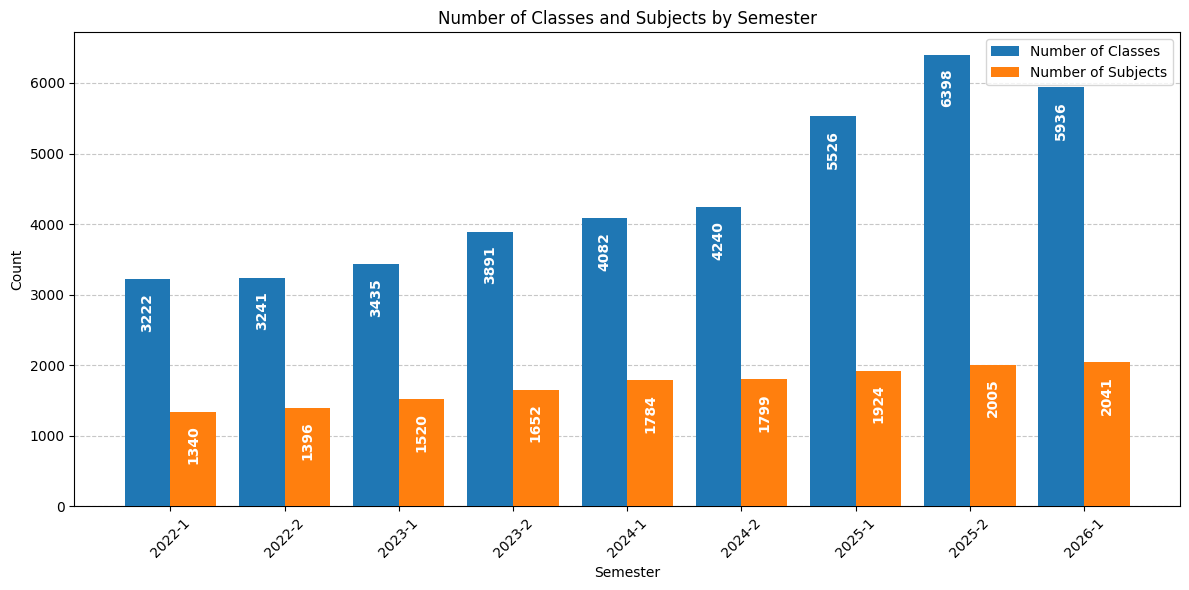

In [262]:
# 1. Prepare Data: Group by Semester and count unique values
# Note: We use .sort_index() to ensure semeters appear chronologically (2022_1 -> 2026_1)
classes_per_semester = programacion.groupby("Semestre")["Número de Clase"].nunique().sort_index()
subjects_per_semester = programacion.groupby("Semestre")["Código Materia"].nunique().sort_index()

# Define the labels (semesters) based on the sorted index
semesters = classes_per_semester.index
x = np.arange(len(semesters))   # Base positions for the x-axis
width = 0.4                     # Bar width

# 2. Setup the Plot (Using fig, ax is better for customization)
fig, ax = plt.subplots(figsize=(12, 6))

# Generate Bars
# Note: 'zorder=3' ensures bars are drawn on top of the grid
rects1 = ax.bar(x - width/2, classes_per_semester.values, width, label='Number of Classes', zorder=3)
rects2 = ax.bar(x + width/2, subjects_per_semester.values, width, label='Number of Subjects', zorder=3)

# 3. Add Vertical Labels inside the bars
def add_vertical_labels(rects):
    """
    Function to attach a text label inside the top of each bar
    displaying its height.
    """
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -10),    # Offset: 10 points down from the top
                    textcoords="offset points",
                    ha='center', va='top', # Center horizontally, align top vertically
                    rotation=90,           # Rotate text vertically
                    color='white',         # White text for contrast
                    fontweight='bold')

add_vertical_labels(rects1)
add_vertical_labels(rects2)

# 4. Chart Formatting
ax.set_title('Number of Classes and Subjects by Semester')
ax.set_xlabel('Semester')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(semesters, rotation=45) # 45 degrees is often easier to read than 90
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

plt.tight_layout()
plt.show()

In [263]:
clases_por_semestre = programacion.groupby("Semestre")["Número de Clase"].nunique()
materias_por_semestre = programacion.groupby("Semestre")["Código Materia"].nunique()
#semestres = clases_por_semestre.index
x = np.arange(len(semestres))   # posiciones base
width = 0.4    

# Barras
barras_clases = plt.bar(
    x - width/2,
    clases_por_semestre.values,
    width,
    label='Número de Clases'
)

barras_materias = plt.bar(
    x + width/2,
    materias_por_semestre.values,
    width,
    label='Número de Materias'
)

# Etiquetas
plt.title('Número de Clases y Materias por Semestre')
plt.xlabel('Semestre')
plt.ylabel('Cantidad')
plt.xticks(x, semestres, rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'semestres' is not defined

In [ ]:
print(classes_per_semester)
print(subjects_per_semester)

Semestre
2022-1    3049
2022-2    3077
2023-1    3300
2023-2    3240
2024-1    3255
2024-2    3633
2025-1    4836
2025-2    5541
2026-1    4691
Name: Número de Clase, dtype: int64
Semestre
2022-1    1317
2022-2    1377
2023-1    1491
2023-2    1542
2024-1    1436
2024-2    1623
2025-1    1762
2025-2    1755
2026-1    1788
Name: Código Materia, dtype: int64


hacer el replace de los codigos de los semestres 2166 por 2022-1 --> Hecho
replace de los nombres de las columnas --> Hecho

cantidad de estudiantes por semestre

cantidad de estudiantes por escuela x semestre

cantidad de materias y clases por escuela (grafico de parche)

estudiantes a lo largo del tiemo en x materia

In [ ]:
prog_acad_semestre_escuela = programacion.groupby(["Semestre", "Escuela"])["Número de Clase"].nunique().unstack(fill_value=0)
prog_acad_semestre_escuela

Escuela,Direc Dsllo Humano y Bienestar,E Ciencias Aplic e Ingeniería,"E.Finanzas, Economía, Gobierno",Escuela de Administración,Escuela de Artes y Humanidades,Escuela de Ciencias,Escuela de Derecho,Vicerrectoría Soste y Proy Soc,Vicerrectoría de Aprendizaje
Semestre,,,,,,,,,
2022-1,0,611,185,476,884,388,209,221,75
2022-2,0,1044,167,545,782,53,180,125,181
2023-1,0,1062,170,594,788,58,213,174,241
2023-2,0,1025,210,582,806,41,180,135,261
2024-1,0,1211,232,651,699,1,197,179,85
2024-2,0,1260,241,750,768,0,302,144,168
2025-1,83,1265,267,753,989,0,271,101,1107
2025-2,67,1210,269,744,1783,0,262,78,1128
2026-1,86,1305,313,758,1308,0,254,105,562


C:\Users\hzapata1\AppData\Local\Temp\ipykernel_17064\1235906372.py:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, valores_ing, 'o-', linewidth=2, linestyle='solid', label='Esc ing', color='blue')
C:\Users\hzapata1\AppData\Local\Temp\ipykernel_17064\1235906372.py:35: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, valores_feg, 'o-', linewidth=2, linestyle='solid', label='Esc FEG', color='green')
C:\Users\hzapata1\AppData\Local\Temp\ipykernel_17064\1235906372.py:38: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, valores_admon, 'o-', linewidth=2, linestyle='solid', label='E

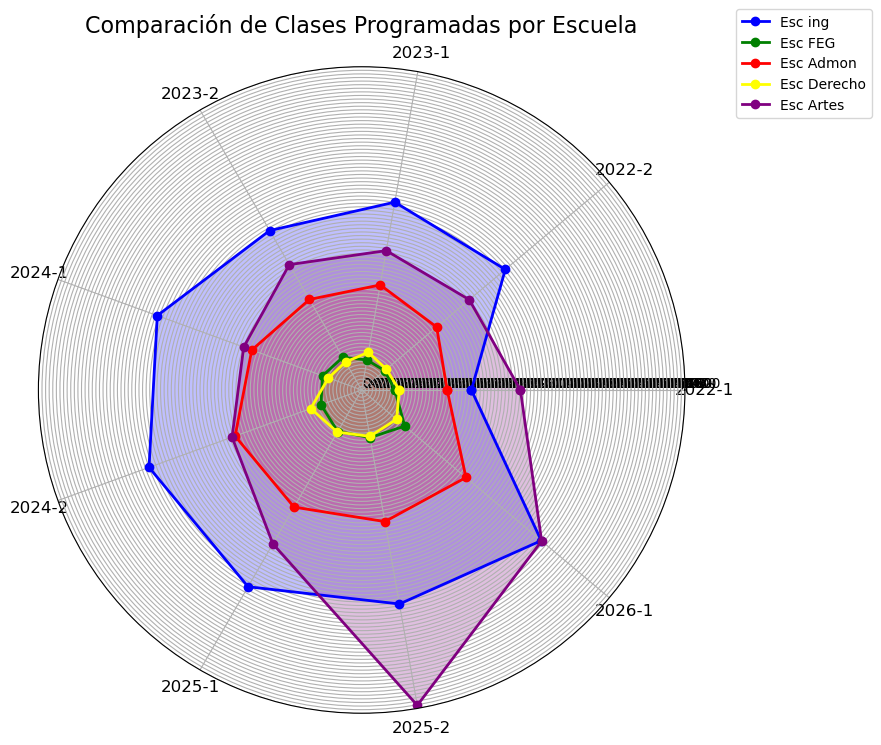

In [ ]:
# preparar los datos para el gráfico de araña
#los semestres serán nuestros ejes radiales (variables)
idx_semestres = prog_acad_semestre_escuela.index.tolist()
num_semestres = len(idx_semestres)

#calcular el ángulo paa cada eje radial
# Sumamos el primer ángulo al final para cerrar el polígono en el gráfico
angles = np.linspace(0, 2 * np.pi, num_semestres, endpoint=False).tolist()
angles += angles[:1] # Esto es clave para que el polígono se cierre

# Extraer los datos para cada equipo.
valores_ing = prog_acad_semestre_escuela['E Ciencias Aplic e Ingeniería'].tolist()
valores_ing += valores_ing[:1]

valores_artes = prog_acad_semestre_escuela['Escuela de Artes y Humanidades'].tolist()
valores_artes += valores_artes[:1]

valores_feg = prog_acad_semestre_escuela['E.Finanzas, Economía, Gobierno'].tolist()
valores_feg += valores_feg[:1]

valores_admon = prog_acad_semestre_escuela['Escuela de Administración'].tolist()
valores_admon += valores_admon[:1]

valores_derecho = prog_acad_semestre_escuela['Escuela de Derecho'].tolist()
valores_derecho += valores_derecho[:1]

#  Crear el Gráfico de Araña
plt.figure(figsize=(9, 9)) # Ajusta el tamaño de la figura para un buen círculo
ax = plt.subplot(111, polar=True) # Creamos un subplot con proyección polar

# Dibujar cada polígono para cada equipo
ax.plot(angles, valores_ing, 'o-', linewidth=2, linestyle='solid', label='Esc ing', color='blue')
ax.fill(angles, valores_ing, color='blue', alpha=0.25) # Rellena el área para mejor visualización

ax.plot(angles, valores_feg, 'o-', linewidth=2, linestyle='solid', label='Esc FEG', color='green')
ax.fill(angles, valores_feg, color='green', alpha=0.25)

ax.plot(angles, valores_admon, 'o-', linewidth=2, linestyle='solid', label='Esc Admon', color='red')
ax.fill(angles, valores_admon, color='red', alpha=0.25)

ax.plot(angles, valores_derecho, 'o-', linewidth=2, linestyle='solid', label='Esc Derecho', color='yellow')
ax.fill(angles, valores_derecho, color='yellow', alpha=0.25)

ax.plot(angles, valores_artes, 'o-', linewidth=2, linestyle='solid', label='Esc Artes', color='purple')
ax.fill(angles, valores_artes, color='purple', alpha=0.25)

# 4. Personalizar el Gráfico
# Establecer los ticks para los ejes radiales (la escala)
ax.set_rticks(np.arange(0, 2000, 20)) # Ticks en 0, 2, 4, 6, 8, 10
ax.set_rlabel_position(0) # Posición de las etiquetas de la escala
ax.set_rlim(0, 1800) # Rango de la escala de 0 a 10

# Establecer las etiquetas de las habilidades en los ejes
ax.set_xticks(angles[:-1]) # Establecer la posición de las etiquetas
ax.set_xticklabels(idx_semestres, fontsize=12) # Asignar los nombres de las habilidades

# Añadir título y leyenda
plt.title('Comparación de Clases Programadas por Escuela', va='bottom', fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1)) # Posicionar la leyenda fuera del gráfico

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Perfom automated EDA and Compare results between manual and automated EDA

# EDA SARA

In [104]:
#Librerías para el gráfico de líneas
import matplotlib.pyplot as plt
import seaborn as sns

Total de estudiantes inscritos por semestre:


Semestre
2022-1    44024.0
2022-2    45611.0
2023-1    47681.0
2023-2    47376.0
2024-1    50882.0
2024-2    51156.0
2025-1    76363.0
2025-2    56574.0
2026-1    61440.0
Name: Total_Inscritos, dtype: float64

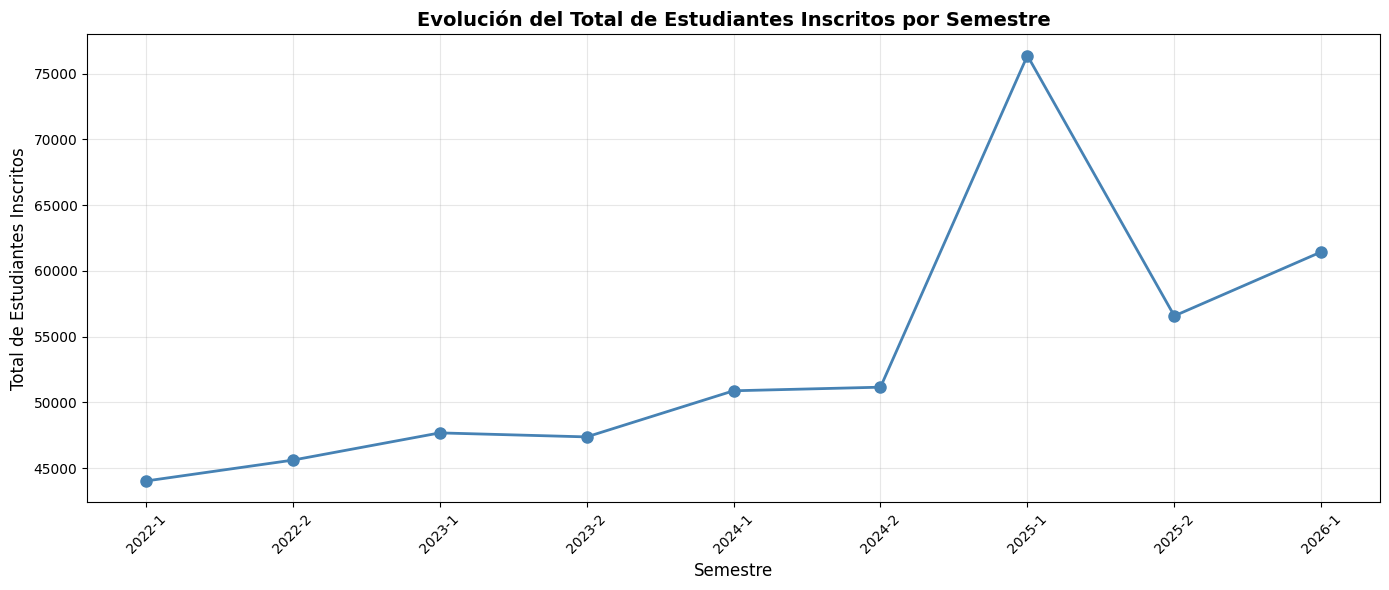


Tendencia general: +17416 estudiantes
Cambio porcentual total: +39.56%


In [105]:
# Agrupar total de estudiantes por semestre
estudiantes_por_semestre = df_final.groupby('Semestre')['Total_Inscritos'].sum().sort_index()

print("Total de estudiantes inscritos por semestre:")
display(estudiantes_por_semestre)

# Gráfico de líneas
plt.figure(figsize=(14, 6))
plt.plot(estudiantes_por_semestre.index, estudiantes_por_semestre.values, 
         marker='o', linewidth=2, markersize=8, color='steelblue')
plt.title('Evolución del Total de Estudiantes Inscritos por Semestre', fontsize=14, fontweight='bold')
plt.xlabel('Semestre', fontsize=12)
plt.ylabel('Total de Estudiantes Inscritos', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calcular tendencia
print(f"\nTendencia general: {estudiantes_por_semestre.iloc[-1] - estudiantes_por_semestre.iloc[0]:+.0f} estudiantes")
print(f"Cambio porcentual total: {((estudiantes_por_semestre.iloc[-1] / estudiantes_por_semestre.iloc[0]) - 1) * 100:+.2f}%")

Clasificación de Materias según Oferta Semestral:


Tipo Oferta
Ambos Semestres    2116
Solo Semestre-1     189
Solo Semestre-2      29
Name: count, dtype: int64

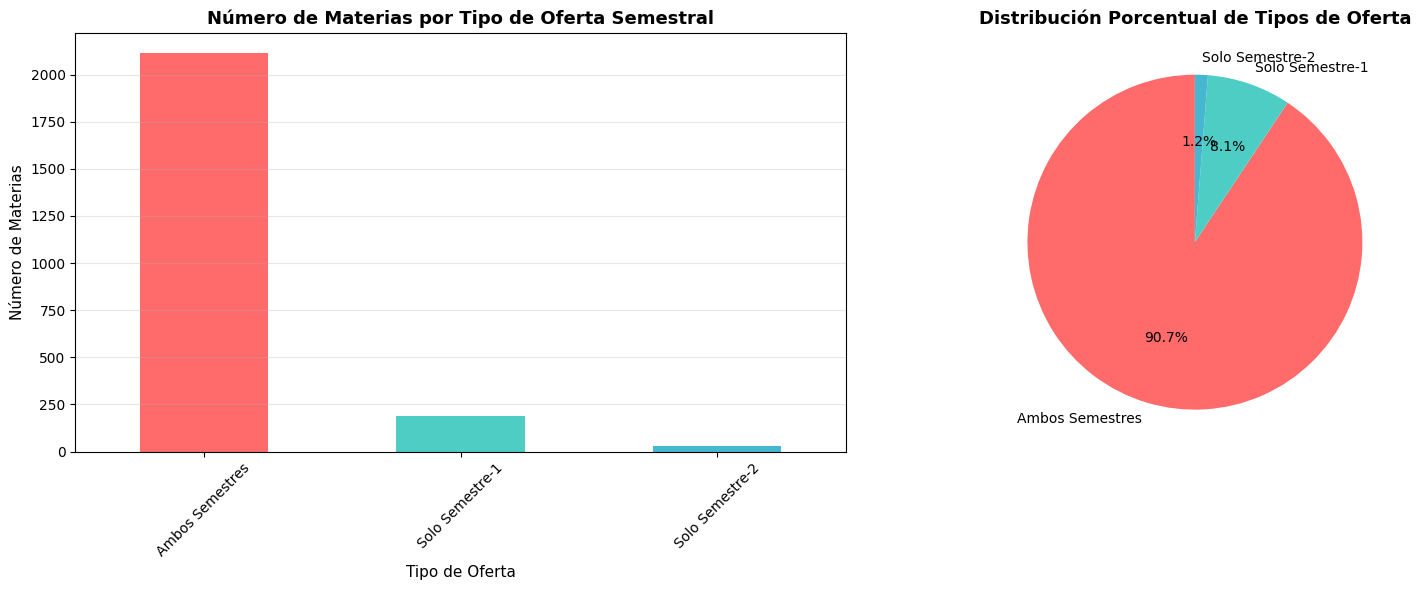


--- Ejemplos de Materias por Tipo ---

Ambos Semestres:
  -  D.I.H. y Crímenes de Guerra.
  -  Estudios de Liter. Colomb.
  -  Probl. Contempor. de Hermen.
  - 1 Crédito Línea Énfasis - ldth
  - 2 Umes Consultorio Jurídico

Solo Semestre-1:
  - Anális Datos para Produ Conten
  - Análisis 2
  - Aplicaciones Sist. Escalables
  - Aprendizaje Basado en Retos FE
  - Armonía 1

Solo Semestre-2:
  - Bombas y Turbinas
  - Comunicación de la Ciencia
  - Econometría Bayesiana
  - Electrotecnia 1
  - Específico - Trombón 6

VALIDACIÓN PARA DIVISIÓN TRAIN/TEST
Materias anualizadas (solo sem-1 o sem-2): 218
Materias totales: 2334
Porcentaje de materias anualizadas: 9.34%

NOTA: Si hay muchas materias anualizadas, dejar los últimos 2 semestres
para test garantiza que se evalúe en datos de todas las materias.


In [108]:
# Identificar en qué semestres se ofrece cada materia
materias_semestres = df_final.groupby('Nombre Materia')['Semestre'].apply(list).to_dict()

# Clasificar materias según patrón semestral
def clasificar_materia(semestres):
    """Clasifica materias según cuándo se ofertan"""
    solo_1 = all('-1' in sem for sem in semestres)  # Solo primer semestre
    solo_2 = all('-2' in sem for sem in semestres)  # Solo segundo semestre
    ambos = any('-1' in sem for sem in semestres) and any('-2' in sem for sem in semestres)
    
    if solo_1:
        return 'Solo Semestre-1'
    elif solo_2:
        return 'Solo Semestre-2'
    elif ambos:
        return 'Ambos Semestres'
    else:
        return 'Otro'

# Aplicar clasificación
clasificacion = {}
for materia, semestres in materias_semestres.items():
    clasificacion[materia] = clasificar_materia(semestres)

clasificacion_df = pd.DataFrame(list(clasificacion.items()), 
                                columns=['Nombre Materia', 'Tipo Oferta'])

# Contar por tipo
resumen_tipo = clasificacion_df['Tipo Oferta'].value_counts()

print("Clasificación de Materias según Oferta Semestral:")
display(resumen_tipo)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
resumen_tipo.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Número de Materias por Tipo de Oferta Semestral', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Tipo de Oferta', fontsize=11)
axes[0].set_ylabel('Número de Materias', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Gráfico de pastel
axes[1].pie(resumen_tipo.values, labels=resumen_tipo.index, autopct='%1.1f%%', 
            startangle=90, colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_title('Distribución Porcentual de Tipos de Oferta', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Mostrar algunas materias de cada tipo
print("\n--- Ejemplos de Materias por Tipo ---")
for tipo in resumen_tipo.index:
    materias_ejemplo = clasificacion_df[clasificacion_df['Tipo Oferta'] == tipo]['Nombre Materia'].head(5).tolist()
    print(f"\n{tipo}:")
    for mat in materias_ejemplo:
        print(f"  - {mat}")

# Validación para test
print("\n" + "="*70)
print("VALIDACIÓN PARA DIVISIÓN TRAIN/TEST")
print("="*70)
materias_anulizadas = clasificacion_df[clasificacion_df['Tipo Oferta'] != 'Ambos Semestres']['Nombre Materia'].nunique()
total_materias = clasificacion_df['Nombre Materia'].nunique()
print(f"Materias anualizadas (solo sem-1 o sem-2): {materias_anulizadas}")
print(f"Materias totales: {total_materias}")
print(f"Porcentaje de materias anualizadas: {(materias_anulizadas/total_materias)*100:.2f}%")
print("\nNOTA: Si hay muchas materias anualizadas, dejar los últimos 2 semestres")
print("para test garantiza que se evalúe en datos de todas las materias.")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17952\1196117171.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  decrecimiento_por_materia = df_final.groupby('Nombre Materia').apply(


Estadísticas del Cambio Promedio en Población Estudiantil:
count    1290.000000
mean       34.787062
std       145.003357
min      -100.000000
25%        -7.555465
50%         8.837829
75%        35.099841
max      2490.162439
Name: Cambio_Promedio_%, dtype: float64

Cambio promedio general: 34.79%


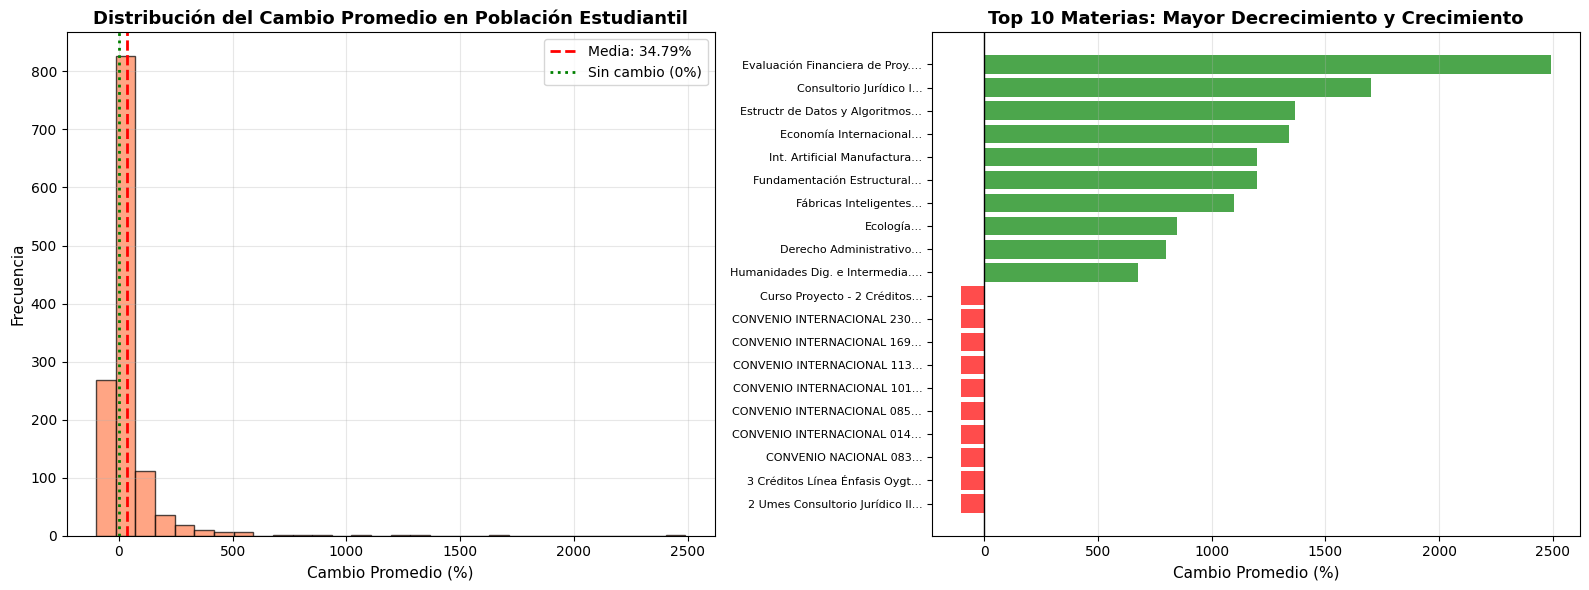


--- Top 10 Materias con Mayor Decrecimiento ---


,Nombre Materia,Cambio_Promedio_%
5,2 Umes Consultorio Jurídico II,-100.0
8,3 Créditos Línea Énfasis Oygt,-100.0
187,CONVENIO NACIONAL 083,-100.0
198,CONVENIO INTERNACIONAL 014,-100.0
201,CONVENIO INTERNACIONAL 085,-100.0
202,CONVENIO INTERNACIONAL 101,-100.0
204,CONVENIO INTERNACIONAL 113,-100.0
206,CONVENIO INTERNACIONAL 169,-100.0
210,CONVENIO INTERNACIONAL 230,-100.0
361,Curso Proyecto - 2 Créditos,-100.0



--- Top 10 Materias con Mayor Crecimiento ---


,Nombre Materia,Cambio_Promedio_%
848,Evaluación Financiera de Proy.,2490.162439
304,Consultorio Jurídico I,1700.000000
824,Estructr de Datos y Algoritmos,1366.465863
556,Economía Internacional,1341.777804
1153,Int. Artificial Manufactura,1200.000000
903,Fundamentación Estructural,1198.536036
929,Fábricas Inteligentes,1100.000000
538,Ecología,850.040596
385,Derecho Administrativo,798.873618
1085,Humanidades Dig. e Intermedia.,677.061756



--- Clasificación de Materias ---
Materias en crecimiento: 823 (63.8%)
Materias en decrecimiento: 438 (34.0%)
Materias estables: 29 (2.2%)


In [109]:
# Calcular cambio en población estudiantil por materia a lo largo del tiempo
def calcular_decrecimiento_materia(df_materia):
    """Calcula el decrecimiento promedio de una materia"""
    df_sorted = df_materia.sort_values('Semestre')
    if len(df_sorted) < 2:
        return np.nan
    
    # Calcular cambios porcentuales entre semestres consecutivos
    cambios = []
    for i in range(1, len(df_sorted)):
        actual = df_sorted.iloc[i]['Total_Inscritos']
        anterior = df_sorted.iloc[i-1]['Total_Inscritos']
        
        if anterior > 0:  # Evitar división por cero
            cambio_porcentual = ((actual - anterior) / anterior) * 100
            cambios.append(cambio_porcentual)
    
    return np.mean(cambios) if cambios else np.nan

# Aplicar a cada materia
decrecimiento_por_materia = df_final.groupby('Nombre Materia').apply(
    calcular_decrecimiento_materia
).reset_index()
decrecimiento_por_materia.columns = ['Nombre Materia', 'Cambio_Promedio_%']

# Eliminar NaN
decrecimiento_por_materia = decrecimiento_por_materia.dropna()

print("Estadísticas del Cambio Promedio en Población Estudiantil:")
print(decrecimiento_por_materia['Cambio_Promedio_%'].describe())

# Promedio general
promedio_cambio = decrecimiento_por_materia['Cambio_Promedio_%'].mean()
print(f"\nCambio promedio general: {promedio_cambio:.2f}%")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma
axes[0].hist(decrecimiento_por_materia['Cambio_Promedio_%'], bins=30, 
             color='coral', edgecolor='black', alpha=0.7)
axes[0].axvline(promedio_cambio, color='red', linestyle='--', linewidth=2, 
                label=f'Media: {promedio_cambio:.2f}%')
axes[0].axvline(0, color='green', linestyle=':', linewidth=2, label='Sin cambio (0%)')
axes[0].set_title('Distribución del Cambio Promedio en Población Estudiantil', 
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Cambio Promedio (%)', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Top 10 materias con mayor decrecimiento y crecimiento
top_decrecimiento = decrecimiento_por_materia.nsmallest(10, 'Cambio_Promedio_%')
top_crecimiento = decrecimiento_por_materia.nlargest(10, 'Cambio_Promedio_%')

combined = pd.concat([top_decrecimiento, top_crecimiento]).sort_values('Cambio_Promedio_%')
colors = ['red' if x < 0 else 'green' for x in combined['Cambio_Promedio_%']]

# Truncar nombres largos para mejor visualización
combined['Nombre_Corto'] = combined['Nombre Materia'].str[:30] + '...'

axes[1].barh(range(len(combined)), combined['Cambio_Promedio_%'], color=colors, alpha=0.7)
axes[1].set_yticks(range(len(combined)))
axes[1].set_yticklabels(combined['Nombre_Corto'], fontsize=8)
axes[1].set_title('Top 10 Materias: Mayor Decrecimiento y Crecimiento', 
                  fontsize=13, fontweight='bold')
axes[1].set_xlabel('Cambio Promedio (%)', fontsize=11)
axes[1].axvline(0, color='black', linestyle='-', linewidth=1)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Mostrar tabla completa de top 10
print("\n--- Top 10 Materias con Mayor Decrecimiento ---")
display(top_decrecimiento[['Nombre Materia', 'Cambio_Promedio_%']])

print("\n--- Top 10 Materias con Mayor Crecimiento ---")
display(top_crecimiento[['Nombre Materia', 'Cambio_Promedio_%']])

# Clasificar materias
print("\n--- Clasificación de Materias ---")
crecientes = (decrecimiento_por_materia['Cambio_Promedio_%'] > 0).sum()
decrecientes = (decrecimiento_por_materia['Cambio_Promedio_%'] < 0).sum()
estables = (decrecimiento_por_materia['Cambio_Promedio_%'] == 0).sum()

print(f"Materias en crecimiento: {crecientes} ({crecientes/len(decrecimiento_por_materia)*100:.1f}%)")
print(f"Materias en decrecimiento: {decrecientes} ({decrecientes/len(decrecimiento_por_materia)*100:.1f}%)")
print(f"Materias estables: {estables} ({estables/len(decrecimiento_por_materia)*100:.1f}%)")


G_Abiertos:
  Outliers detectados: 330
  Rango normal: [1.00, 1.00]

G_Final:
  Outliers detectados: 278
  Rango normal: [1.00, 1.00]

Total_Inscritos:
  Outliers detectados: 1385
  Rango normal: [-45.00, 83.00]

Total_Cupos_No usados:
  Outliers detectados: 1088
  Rango normal: [-29.50, 62.50]


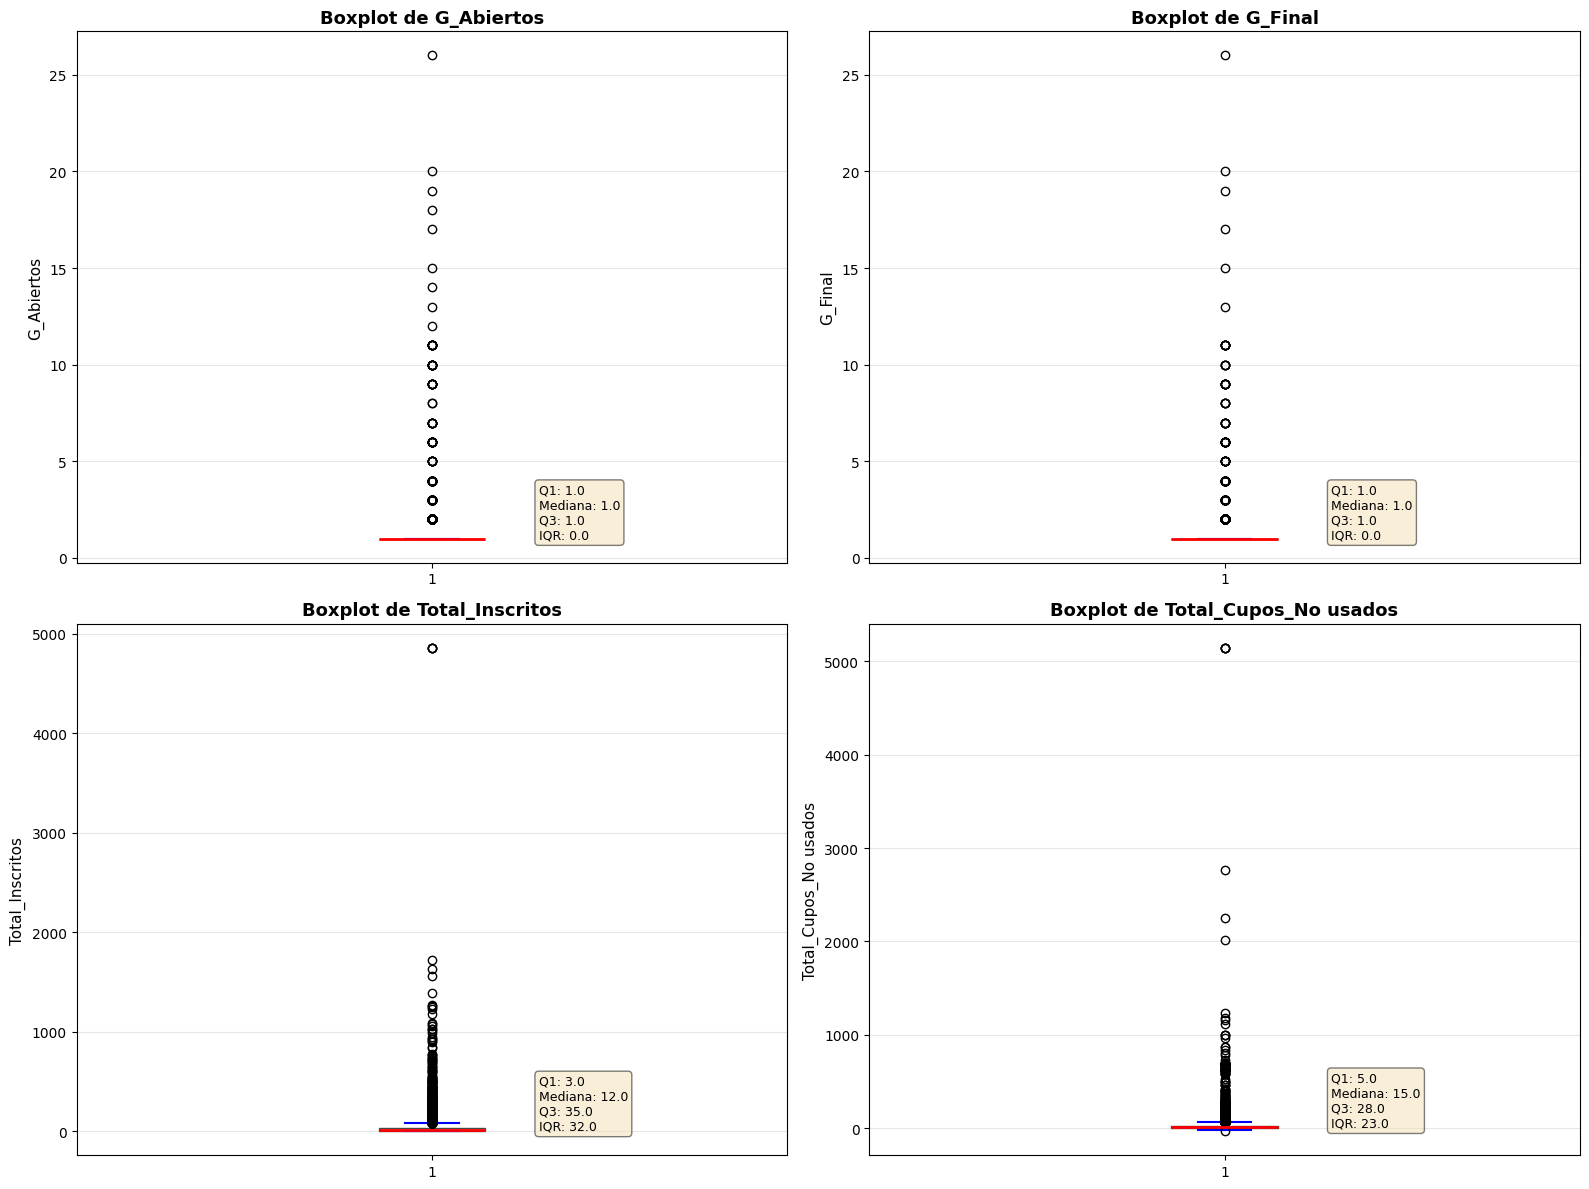

In [110]:
# Variables para boxplot
variables = ['G_Abiertos', 'G_Final', 'Total_Inscritos', 'Total_Cupos_No usados']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(variables):
    # Boxplot
    bp = axes[idx].boxplot(df_final[col].dropna(), vert=True, patch_artist=True,
                           boxprops=dict(facecolor='lightblue', alpha=0.7),
                           medianprops=dict(color='red', linewidth=2),
                           whiskerprops=dict(color='blue', linewidth=1.5),
                           capprops=dict(color='blue', linewidth=1.5))
    
    axes[idx].set_title(f'Boxplot de {col}', fontsize=13, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=11)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Estadísticas en el gráfico
    q1 = df_final[col].quantile(0.25)
    q2 = df_final[col].median()
    q3 = df_final[col].quantile(0.75)
    iqr = q3 - q1
    
    stats_text = f'Q1: {q1:.1f}\nMediana: {q2:.1f}\nQ3: {q3:.1f}\nIQR: {iqr:.1f}'
    axes[idx].text(1.15, df_final[col].median(), stats_text, fontsize=9,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Detectar outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_final[(df_final[col] < lower_bound) | (df_final[col] > upper_bound)][col]
    
    print(f"\n{col}:")
    print(f"  Outliers detectados: {len(outliers)}")
    print(f"  Rango normal: [{lower_bound:.2f}, {upper_bound:.2f}]")

plt.tight_layout()
plt.show()

ANÁLISIS DE DISTRIBUCIÓN: TOTAL_INSCRITOS

Estadísticas Descriptivas:
count    13929.000000
mean        34.539953
std        109.892748
min          0.000000
25%          3.000000
50%         12.000000
75%         35.000000
max       4858.000000
Name: Total_Inscritos, dtype: float64
ANÁLISIS DE DISTRIBUCIÓN: TOTAL_INSCRITOS

Estadísticas Descriptivas:
count    13929.000000
mean        34.539953
std        109.892748
min          0.000000
25%          3.000000
50%         12.000000
75%         35.000000
max       4858.000000
Name: Total_Inscritos, dtype: float64

Distribución por Rangos:


Total_Inscritos
0-5      3243
6-10     1930
11-20    2363
21-30    1120
31-40     831
41-50     668
51-60     481
61-70     290
71-80     231
81-90     175
91+       173
Name: count, dtype: int64

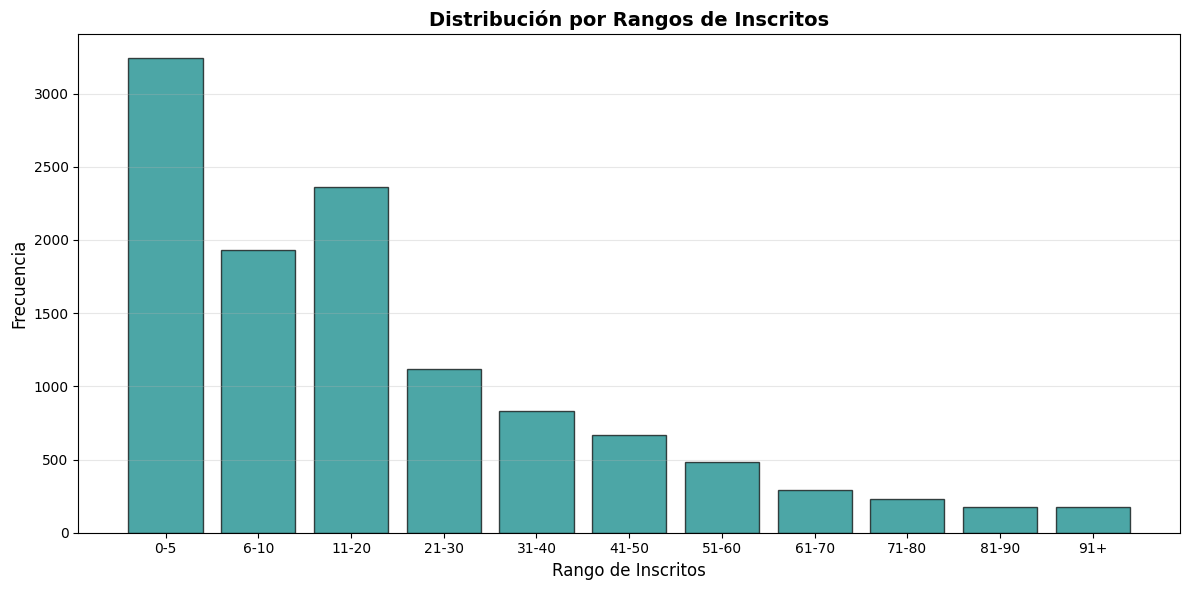

In [117]:
# Análisis detallado de la distribución de inscritos
inscritos = df_final['Total_Inscritos'].dropna()

print("="*70)
print("ANÁLISIS DE DISTRIBUCIÓN: TOTAL_INSCRITOS")
print("="*70)
print(f"\nEstadísticas Descriptivas:")
print(inscritos.describe())

# Análisis de la distribución de inscritos por rangos
inscritos = df_final['Total_Inscritos'].dropna()

print("="*70)
print("ANÁLISIS DE DISTRIBUCIÓN: TOTAL_INSCRITOS")
print("="*70)
print(f"\nEstadísticas Descriptivas:")
print(inscritos.describe())

# Distribución por rangos
rangos = pd.cut(inscritos, bins=[0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                labels=['0-5', '6-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+'])
conteo_rangos = rangos.value_counts().sort_index()

print("\nDistribución por Rangos:")
display(conteo_rangos)

# Visualización
plt.figure(figsize=(12, 6))
plt.bar(range(len(conteo_rangos)), conteo_rangos.values, 
        color='teal', alpha=0.7, edgecolor='black')
plt.xticks(range(len(conteo_rangos)), conteo_rangos.index, rotation=0)
plt.title('Distribución por Rangos de Inscritos', fontsize=14, fontweight='bold')
plt.xlabel('Rango de Inscritos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

MATERIA CON MÁXIMO DE ESTUDIANTES POR SEMESTRE


,Semestre,Nombre Materia,Escuela,Total_Inscritos,G_Final
588,2022-1,Análisis Textual (Nfi),Escuela de Artes y Humanidades,1077.0,2.0
2598,2022-2,Pre-Práctica,Vicerrectoría de Aprendizaje,721.0,1.0
2761,2023-1,Inducción,Direc Dsllo Humano y Bienestar,1229.0,1.0
4306,2023-2,Taller de Salud,Direc Dsllo Humano y Bienestar,928.0,1.0
5942,2024-1,Taller de Salud,Direc Dsllo Humano y Bienestar,1264.0,1.0
7711,2024-2,Taller de Salud,Direc Dsllo Humano y Bienestar,1027.0,1.0
10424,2025-1,Prueba de Lectura 1,Escuela de Artes y Humanidades,4858.0,1.0
12346,2025-2,Prueba de Escritura 1,Escuela de Artes y Humanidades,1723.0,1.0
13395,2026-1,Taller de Salud,Direc Dsllo Humano y Bienestar,1387.0,1.0



ESCUELA CON MÁXIMO DE ESTUDIANTES POR SEMESTRE


,Semestre,Escuela,Total_Inscritos
3,2022-1,Escuela de Administración,11164.0
10,2022-2,E Ciencias Aplic e Ingeniería,14493.0
19,2023-1,E Ciencias Aplic e Ingeniería,15254.0
28,2023-2,E Ciencias Aplic e Ingeniería,14989.0
37,2024-1,E Ciencias Aplic e Ingeniería,15360.0
48,2024-2,Escuela de Administración,14889.0
57,2025-1,Escuela de Artes y Humanidades,29895.0
64,2025-2,Escuela de Administración,15618.0
72,2026-1,Escuela de Administración,15978.0


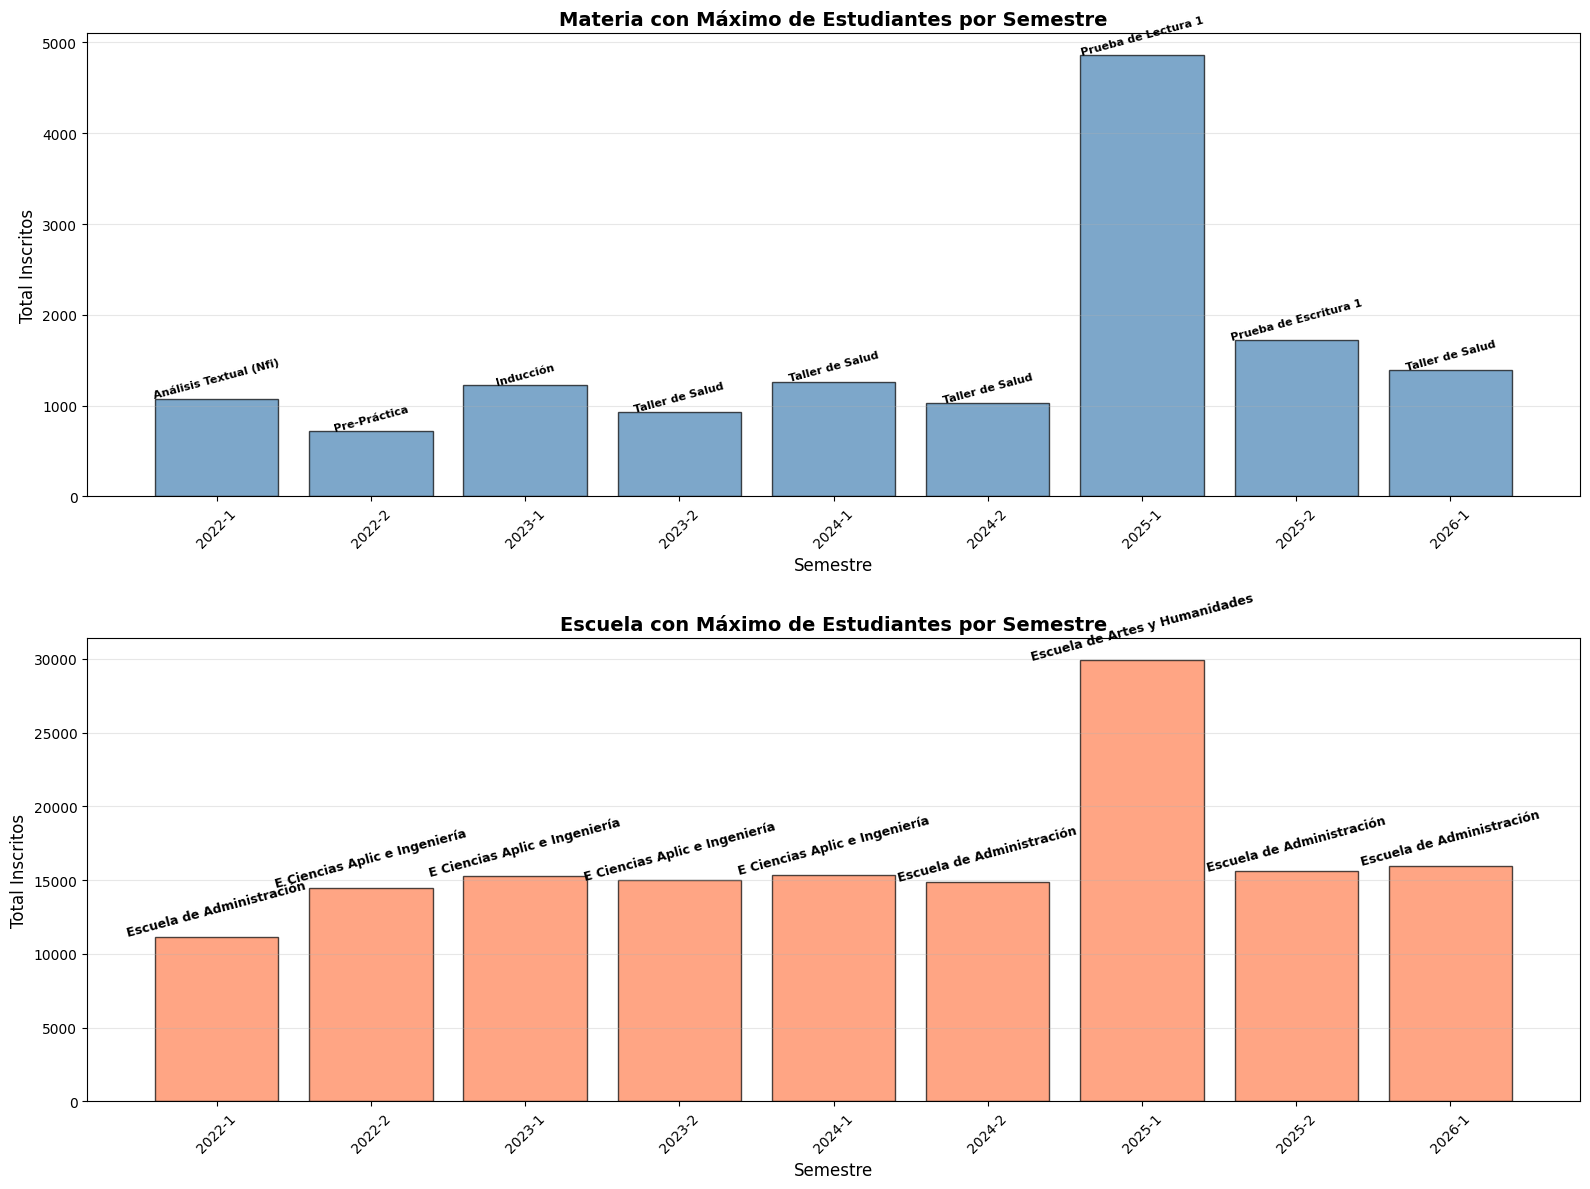


TOP 5 MATERIAS CON MÁS ESTUDIANTES (TODO EL PERIODO)


Nombre Materia
Inducción                  10200.0
Prueba de Escritura 1       7831.0
Prueba de Lectura 1         7505.0
Ciudadanía y Democracia     7070.0
Taller de Salud             6703.0
Name: Total_Inscritos, dtype: float64


TOP 5 ESCUELAS CON MÁS ESTUDIANTES (TODO EL PERIODO)


Escuela
E Ciencias Aplic e Ingeniería     128351.0
Escuela de Administración         124888.0
Escuela de Artes y Humanidades     98593.0
E.Finanzas, Economía, Gobierno     42991.0
Escuela de Derecho                 38736.0
Name: Total_Inscritos, dtype: float64

In [115]:
# Máximo por semestre - Nivel Materia
max_materia_por_semestre = df_final.loc[df_final.groupby('Semestre')['Total_Inscritos'].idxmax()]

print("="*80)
print("MATERIA CON MÁXIMO DE ESTUDIANTES POR SEMESTRE")
print("="*80)
display(max_materia_por_semestre[['Semestre', 'Nombre Materia', 'Escuela', 'Total_Inscritos', 'G_Final']])

# Máximo por semestre - Nivel Escuela
estudiantes_por_escuela_semestre = df_final.groupby(['Semestre', 'Escuela'])['Total_Inscritos'].sum().reset_index()
max_escuela_por_semestre = estudiantes_por_escuela_semestre.loc[
    estudiantes_por_escuela_semestre.groupby('Semestre')['Total_Inscritos'].idxmax()
]

print("\n" + "="*80)
print("ESCUELA CON MÁXIMO DE ESTUDIANTES POR SEMESTRE")
print("="*80)
display(max_escuela_por_semestre)

# Visualización
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Gráfico 1: Máximo por materia
axes[0].bar(max_materia_por_semestre['Semestre'], 
            max_materia_por_semestre['Total_Inscritos'],
            color='steelblue', alpha=0.7, edgecolor='black')

# Anotar con nombres de materias (truncados)
for i, row in max_materia_por_semestre.iterrows():
    nombre_corto = row['Nombre Materia'][:25] + '...' if len(row['Nombre Materia']) > 25 else row['Nombre Materia']
    axes[0].text(row['Semestre'], row['Total_Inscritos'] + 2, 
                nombre_corto, ha='center', fontsize=8, fontweight='bold', rotation=15)

axes[0].set_title('Materia con Máximo de Estudiantes por Semestre', 
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel('Semestre', fontsize=12)
axes[0].set_ylabel('Total Inscritos', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Gráfico 2: Máximo por escuela
axes[1].bar(max_escuela_por_semestre['Semestre'], 
            max_escuela_por_semestre['Total_Inscritos'],
            color='coral', alpha=0.7, edgecolor='black')

# Anotar con nombres de escuelas
for i, row in max_escuela_por_semestre.iterrows():
    axes[1].text(row['Semestre'], row['Total_Inscritos'] + 20, 
                row['Escuela'], ha='center', fontsize=9, fontweight='bold', rotation=15)

axes[1].set_title('Escuela con Máximo de Estudiantes por Semestre', 
                 fontsize=14, fontweight='bold')
axes[1].set_xlabel('Semestre', fontsize=12)
axes[1].set_ylabel('Total Inscritos', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Top 5 materias con más estudiantes en todo el periodo
print("\n" + "="*80)
print("TOP 5 MATERIAS CON MÁS ESTUDIANTES (TODO EL PERIODO)")
print("="*80)
top_materias = df_final.groupby('Nombre Materia')['Total_Inscritos'].sum().sort_values(ascending=False).head(5)
display(top_materias)

# Top 5 escuelas con más estudiantes en todo el periodo
print("\n" + "="*80)
print("TOP 5 ESCUELAS CON MÁS ESTUDIANTES (TODO EL PERIODO)")
print("="*80)
top_escuelas = df_final.groupby('Escuela')['Total_Inscritos'].sum().sort_values(ascending=False).head(5)
display(top_escuelas)

In [116]:
print("="*80)
print("RESUMEN EJECUTIVO DEL EDA")
print("="*80)

print(f"\n1. EVOLUCIÓN TEMPORAL:")
print(f"   - Estudiantes primer semestre: {estudiantes_por_semestre.iloc[0]:.0f}")
print(f"   - Estudiantes último semestre: {estudiantes_por_semestre.iloc[-1]:.0f}")
print(f"   - Cambio total: {((estudiantes_por_semestre.iloc[-1] / estudiantes_por_semestre.iloc[0]) - 1) * 100:+.2f}%")

print(f"\n2. MATERIAS ANUALIZADAS:")
print(f"   - Solo Semestre-1: {resumen_tipo.get('Solo Semestre-1', 0)}")
print(f"   - Solo Semestre-2: {resumen_tipo.get('Solo Semestre-2', 0)}")
print(f"   - Ambos Semestres: {resumen_tipo.get('Ambos Semestres', 0)}")

print(f"\n3. POBLACIÓN ESTUDIANTIL:")
print(f"   - Cambio promedio por materia: {promedio_cambio:.2f}%")
print(f"   - Materias en crecimiento: {crecientes}")
print(f"   - Materias en decrecimiento: {decrecientes}")

print(f"\n4. DISTRIBUCIÓN DE INSCRITOS:")
print(f"   - Media: {inscritos.mean():.2f}")
print(f"   - Mediana: {inscritos.median():.2f}")
print(f"   - Desviación estándar: {inscritos.std():.2f}")
print(f"   - Asimetría: {stats.skew(inscritos):.4f}")

print(f"\n5. MÁXIMOS:")
if len(max_materia_por_semestre) > 0:
    materia_mas_frecuente = max_materia_por_semestre['Nombre Materia'].mode()
    if len(materia_mas_frecuente) > 0:
        print(f"   - Materia más grande (frecuente): {materia_mas_frecuente[0]}")
if len(max_escuela_por_semestre) > 0:
    escuela_mas_frecuente = max_escuela_por_semestre['Escuela'].mode()
    if len(escuela_mas_frecuente) > 0:
        print(f"   - Escuela más grande (frecuente): {escuela_mas_frecuente[0]}")

print("="*80)

RESUMEN EJECUTIVO DEL EDA

1. EVOLUCIÓN TEMPORAL:
   - Estudiantes primer semestre: 44024
   - Estudiantes último semestre: 61440
   - Cambio total: +39.56%

2. MATERIAS ANUALIZADAS:
   - Solo Semestre-1: 189
   - Solo Semestre-2: 29
   - Ambos Semestres: 2116

3. POBLACIÓN ESTUDIANTIL:
   - Cambio promedio por materia: 34.79%
   - Materias en crecimiento: 823
   - Materias en decrecimiento: 438

4. DISTRIBUCIÓN DE INSCRITOS:
   - Media: 34.54
   - Mediana: 12.00
   - Desviación estándar: 109.89
   - Asimetría: 26.8800

5. MÁXIMOS:
   - Materia más grande (frecuente): Taller de Salud
   - Escuela más grande (frecuente): E Ciencias Aplic e Ingeniería


# EDA AUTOMATICO

---

## 6. Descriptive Statistical Analysis

Quantitative summary of the dataset characteristics.

* Measures of Central Tendency (mean, median, mode).
* Measures of Dispersion (standard deviation, variance).
* Correlations between variables.

---

## 7. Findings and Business Insights

Argumentation of the results obtained in the previous phases.

* **Finding 1:** [Description] -> **Impact:** [Business Value].
* **Finding 2:** [Description] -> **Impact:** [Business Value].
* **General Conclusion:** How does this help solve the problem stated in Section 1?

---

## 8. (Optional) Predictive Modeling

Application of Machine Learning algorithms.

### 8.1. Model Training
* Data Splitting (Train/Test).
* Algorithm Selection.

### 8.2. Evaluation and Predictions
* Performance Metrics (Accuracy, RMSE, etc.).

### 8.3. Model Interpretation
* Argumentation on how the predictive model provides tangible added value to the business.

### 8.4. How do the results differ when the model is run with dirty data?
* Run again with dirty data and compare

---

## OTHER:

In [ ]:
#clases_inscripcion = programacion[programacion["Tipo Clase"]=="Sección Inscripción"]#.groupby(["Semestre", "Número de Clase"])["Total Inscritos"].sum()
#clases_inscripcion

In [ ]:
#estudiates_por_semestre = programacion.groupby("Semestre")["Total Inscritos"].sum()
#estudiates_por_semestre